# **Machine Learning Across Breast Cancer Cell Lines**
*Katia Russo, Enrico Adamo, Matteo Colantoni, Sofia Lambro, Andrea Porta*

## - Introduction : background / aim / objective 


## - Material and Methods : 

## **Step 1** : Dataset Overview – *Understanding the Files*


In [1]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap

Before diving into data exploration or modeling, it’s critical to understand what data is available, its origin, and how it’s structured.
We are working with two different single-cell RNA sequencing technologies applied to two breast cancer cell lines, *MCF7* and *HCC1806*:
- SmartSeq datasets:
    - Metadata files
    - Unfiltered raw data
    - Filtered and normalised data both for training and testing
- DropSeq datasets:
    - Filtered and normalised data both for training and testing

#### SmartSeq - metadata files:
These files provide information about the cells that have been analyzed with the SmartSeq technology, such as their position or their condition (normoxia/hypoxia). The rows are the files representing each single cell, while the columns are the features.

In [2]:
# Load the metadata files
mcf_meta = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for MCF7
print("MCF7 Metadata")
print("Shape:", mcf_meta.shape)
print("First 5 rows:")
mcf_meta.head(5)

MCF7 Metadata
Shape: (383, 8)
First 5 rows:


Cell Line           Lane  \
Filename                                                                      
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      MCF7  output.STAR.1   

                                                    Pos Condition  Hours  \
Filename                                                                   
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  A10      Hypo     72   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  A11      Hypo     72   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  A12      Hypo     72   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   A1      Norm     72   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   A2      Norm     72   

                                                   Cell name  \
Filename                                                       
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       S28   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       S29   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       S30   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....        S1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        S2   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  STAR,FeatureCounts  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  STAR,FeatureCounts

In [3]:
# Load the metadata files
hcc_meta = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for HCC1806
print("\nHCC1806 Metadata")
print("Shape:", hcc_meta.shape)
print("First 5 rows:")
hcc_meta.head(5)


HCC1806 Metadata
Shape: (243, 8)
First 5 rows:


Cell Line  PCR Plate  Pos  \
Filename                                                                       
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   HCC1806          1  A10   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...   HCC1806          1  A12   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   HCC1806          1   A1   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...   HCC1806          1   A2   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   HCC1806          1   A3   

                                                   Condition  Hours Cell name  \
Filename                                                                        
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....     Normo     24      S123   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...     Normo     24       S26   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...      Hypo     24       S97   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...      Hypo     24      S104   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...      Hypo     24        S4   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  Aligned.sortedByCoord.out.bam   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  STAR,FeatureCounts  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  STAR,FeatureCounts  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  STAR,FeatureCounts  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  STAR,FeatureCounts  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  STAR,FeatureCounts

Now we download the actual sequencing data. Understanding the shape and the content of the data will give us insights on the structure of the datasets we are going to use.

#### SmartSeq - MCF7:

In [4]:
# Load the filtered dataset with the SmartSeq technology
dfs_mcf_unfiltered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_filtered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_train = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_test = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for MCF7
print("MCF7 Unfiltered")
print("Dataframe dimension:", dfs_mcf_unfiltered.shape)
print("First column: ", dfs_mcf_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Filtered")
print("Dataframe dimension:", dfs_mcf_filtered.shape)
print("First column: ", dfs_mcf_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Training Dataset")
print("Dataframe dimension:", dfs_mcf_train.shape)
print("First column: ", dfs_mcf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfs_mcf_test.shape)
print("First column:", dfs_mcf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Unfiltered
Dataframe dimension: (22934, 383)
First column:  WASH7P       0
MIR6859-1    0
WASH9P       1
OR4F29       0
MTND1P23     0
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 20.10 MB

MCF7 Filtered
Dataframe dimension: (18945, 313)
First column:  WASH7P       0
MIR6859-1    0
WASH9P       1
OR4F29       0
MTND1P23     0
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 14.46 MB

MCF7 Training Dataset
Dataframe dimension: (3000, 250)
First column:  CYP1B1        343
CYP1B1-AS1    140
CYP1A1          0
NDRG1           0
DDIT4         386
Name: output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 1.82 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 63)
First column: CYP1B1         492
CYP1B1-AS1     253
CYP1A1           0
NDRG1         1157
DDIT4         6805
Name: 1, dtype: int64
File dimension: 0.47 MB


#### SmartSeq - HCC1806

In [5]:
# Load the filtered dataset with the SmartSeq technology
dfs_hcc_unfiltered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_filtered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_train = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_test = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for HCC1806
print("HCC1806 Unfiltered")
print("Dataframe dimension:", dfs_hcc_unfiltered.shape)
print("First column: ", dfs_hcc_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Filtered")
print("Dataframe dimension:", dfs_hcc_filtered.shape)
print("First column: ", dfs_hcc_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfs_hcc_train.shape)
print("First column: ", dfs_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfs_hcc_test.shape)
print("First column: ", dfs_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

HCC1806 Unfiltered
Dataframe dimension: (23396, 243)
First column:  WASH7P      0
CICP27      0
DDX11L17    0
WASH9P      0
OR4F29      2
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 13.89 MB

HCC1806 Filtered
Dataframe dimension: (19503, 227)
First column:  CICP27        0
DDX11L17      0
WASH9P        0
OR4F29        2
MTND1P23    250
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 11.39 MB

HCC1806 Training Dataset
Dataframe dimension: (3000, 182)
First column:  DDIT4        0
ANGPTL4     48
CALML5       0
KRT14      321
CCNB1      298
Name: output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 1.31 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 45)
First column:  DDIT4        0
ANGPTL4      0
CALML5       0
KRT14      169
CCNB1      233
Name: 1, dtype: int64
File dimension: 0.34 MB


We checked content and dimension of all the datasets we had for the SmartSeq technology. We can notice that we have the cells on the columns, while the rows are the genes, in this way the datasets give us information on the gene expression profiles in the cells. Moreover, the number of columns of the unfiltered data matches the number of rows of the metadatas, so we have information on the condition of each cell.

#### DropSeq - MCF7:

In [6]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_mtf_train = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfd_mtf_test = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for MCF7
print("MCF7 Training Dataset")
print("Dataframe dimension:", dfd_mtf_train.shape)
print("First column: ", dfd_mtf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfd_mtf_test.shape)
print("First column: ", dfd_mtf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Training Dataset
Dataframe dimension: (3000, 14682)
First column:  H1-5       2
MALAT1     3
MT-RNR2    0
ARVCF      0
BCYRN1     0
Name: AAAAAACCCGGC_Normoxia, dtype: int64
File dimension: 84.37 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 3671)
First column:  H1-5       0
MALAT1     3
MT-RNR2    1
ARVCF      0
BCYRN1     2
Name: 1, dtype: int64
File dimension: 21.06 MB


#### DropSeq - HCC1806

In [7]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_hcc_train = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfd_hcc_test = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))


# Inspect the shape and structure for HCC1806
print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfd_hcc_train.shape)
print("First column: ", dfd_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfd_hcc_test.shape)
print("First column: ", dfd_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")


HCC1806 Training Dataset
Dataframe dimension: (3000, 21626)
First column:  MALAT1     1
MT-RNR2    0
NEAT1      0
H1-5       0
TFF1       4
Name: AAAAACCTATCG_Normoxia, dtype: int64
File dimension: 124.26 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 5406)
First column:  MALAT1     0
MT-RNR2    0
NEAT1      0
H1-5       0
TFF1       3
Name: 1, dtype: int64
File dimension: 31.00 MB


At first sight we can immediately notice the difference in dimension between SmartSeq and DropSeq datasets, given by how each technology works.

For both technologies we have the training and testing datasets where have been retained exactly 3000 genes, probably the most variable ones. We are going to use them for training and testing our model.

The absence of metadata files for the DropSeq experiment make us think that we need two different approach when analyzing the different techniques, probably requiring unsupervised learning for the latter.

---

## **Step 2** : Exploratory Data Analysis

We now will go deeper in the analysis of the row data, exploring both cell lines independently.

### **MCF7 Cell Line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [8]:
dfs_mcf_unfiltered.isnull().values.any()

False

#### - *Check Data Type*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [9]:
dfs_mcf_unfiltered.dtypes

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      int64
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      int64
                                                            ...  
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    int64
Length: 383, dtype: object

In [10]:
(dfs_mcf_unfiltered.dtypes=="int64").all()

True

This ensures that all the entries are integers.

### **2.2** Descriptive Statistic

#### **2.2.1** Per Cell

### 📊 Descriptive Statistics Per Cell – SmartSeq (Unfiltered)

In this cell, we compute basic descriptive statistics for each cell in the **unfiltered SmartSeq dataset** (`dfs_mcf_unfiltered`). The resulting `cell_stats_mcf` DataFrame summarizes:

- `'Mean'`: average gene expression per cell.
- `'Median'`: median expression per cell (robust to outliers).
- `'Std'`: standard deviation (variability in expression across genes).
- `'Min'` / `'Max'`: minimum and maximum gene expression value in each cell.
- `'Q1'` / `'Q3'`: 25th and 75th percentiles (interquartile range).

These values help assess the **complexity and quality of each single cell**. For example, cells with very low total expression or unusually high variability may be artifacts or low-quality.

Only the **head** (first few rows) is printed for readability.


In [11]:
cell_stats_mcf = pd.DataFrame({
    'Mean': dfs_mcf_unfiltered.mean(),
    'Median': dfs_mcf_unfiltered.median(),
    'Std': dfs_mcf_unfiltered.std(),
    'Min': dfs_mcf_unfiltered.min(),
    'Max': dfs_mcf_unfiltered.max(),
    'Q1': dfs_mcf_unfiltered.quantile(0.25),
    'Q3': dfs_mcf_unfiltered.quantile(0.75),
})

print("Per-cell statistics:")
cell_stats_mcf.head()

Per-cell statistics:


Mean  Median  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  40.817651     0.0   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...   0.012253     0.0   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  86.442400     0.0   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   1.024636     0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  14.531351     0.0   

                                                            Std  Min    Max  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...   465.709940    0  46744   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...     0.207726    0     14   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  1036.572689    0  82047   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....     6.097362    0    289   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   123.800530    0  10582   

                                                     Q1    Q3  
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  0.0  17.0  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  0.0   0.0  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  0.0   5.0  
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  0.0   0.0  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.0   7.0

### 🎲 Sampling and Log-Transforming a Subset of SmartSeq Cells

In this cell, we randomly select a **subset of 10 cells** from the unfiltered SmartSeq dataset (`dfs_mcf_unfiltered`) using a fixed random seed for reproducibility.

This small subset is used for **visual inspection** of gene expression patterns.


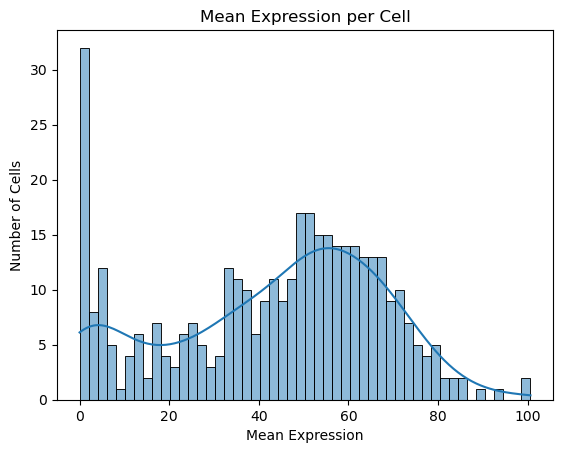

In [12]:
sns.histplot(cell_stats_mcf["Mean"], bins=50, kde=True)
plt.title("Mean Expression per Cell")
plt.xlabel("Mean Expression")
plt.ylabel("Number of Cells")
plt.show()

In this cell, we check whether there are any **duplicate gene expression rows** in the filtered SmartSeq dataset (`dfs_mcf_f1`).

Using `duplicated().any()`, we ask:
> "Are there any genes with identical expression values across all cells?"

A return value of `True` suggests that at least one gene is duplicated — which might indicate redundancy or data preprocessing artifacts. Detecting and potentially removing duplicates helps ensure data integrity and avoid model bias.

Next, we apply a **log transformation** using `log(1 + x)` to reduce the effect of large expression values and make the distribution more visually interpretable — a common preprocessing step for scRNA-seq.

Finally, the dataset is **reshaped ("melted") into long format**, which is required by Seaborn for generating violin or box plots of gene expression across cells.


/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_2243/1729494827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfs_mcf_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")


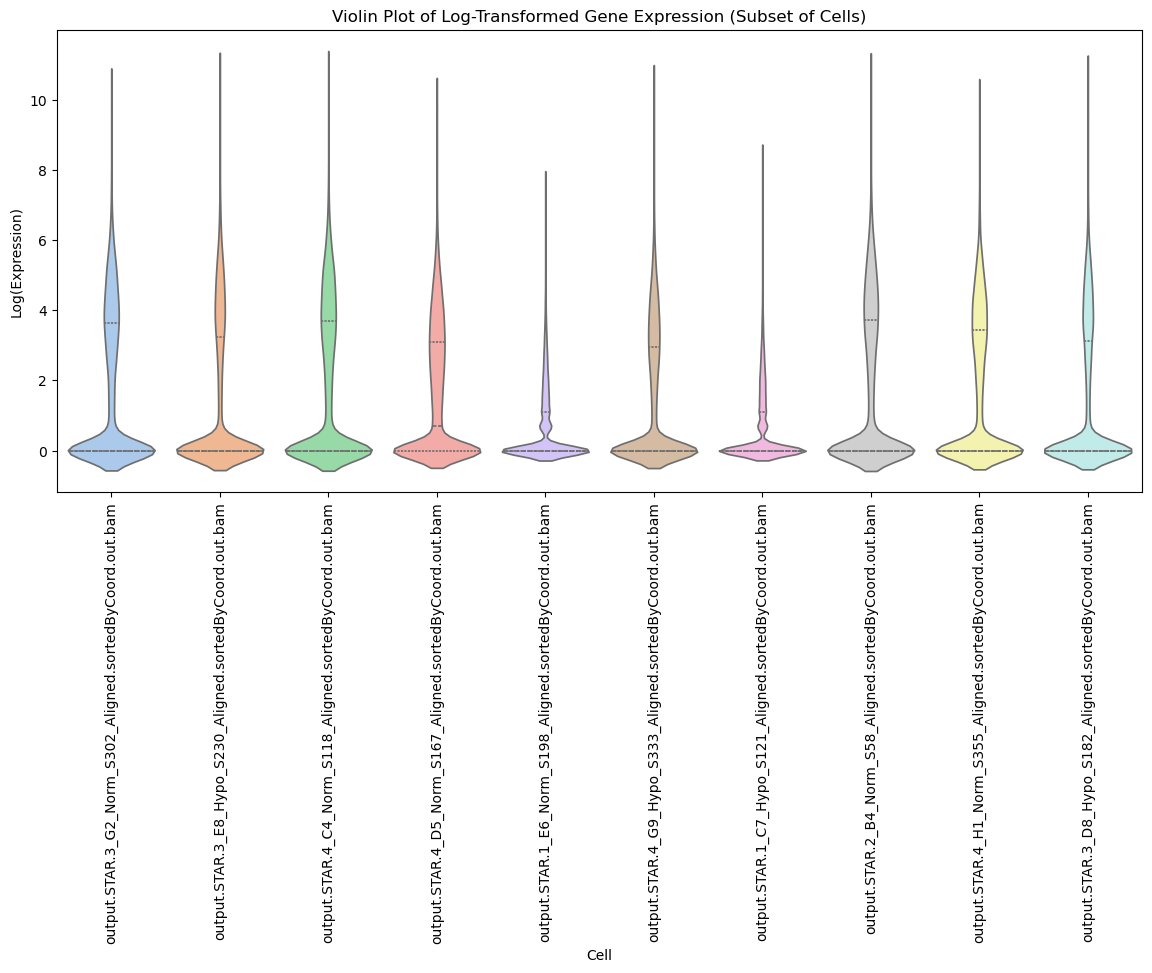

In [13]:
np.random.seed(42)  # per riproducibilità
subset_cells_mcf = np.random.choice(dfs_mcf_unfiltered.columns, size=10, replace=False)
dfs_mcf_subset = dfs_mcf_unfiltered[subset_cells_mcf]

# Log-transform: log(1 + x)
dfs_mcf_log = np.log1p(dfs_mcf_subset)

# Conversione in formato long per Seaborn
dfs_mcf_melted = dfs_mcf_log.melt(var_name="Cell", value_name="Log(Expression)")

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=dfs_mcf_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")
plt.xticks(rotation=90)
plt.title("Violin Plot of Log-Transformed Gene Expression (Subset of Cells)")
plt.show()

We now compute the **correlation matrix** for the selected subset of cells. This matrix shows the **pairwise Pearson correlation coefficients** between the expression profiles of each pair of cells.

Correlation values close to 1 indicate highly similar gene expression patterns, while values near 0 (or negative) suggest little or inverse correlation.

By visualizing this matrix as a **heatmap**, we can visually assess how similar or different the randomly selected cells are. This helps us detect natural groupings, outliers, or unexpected variability within the dataset.


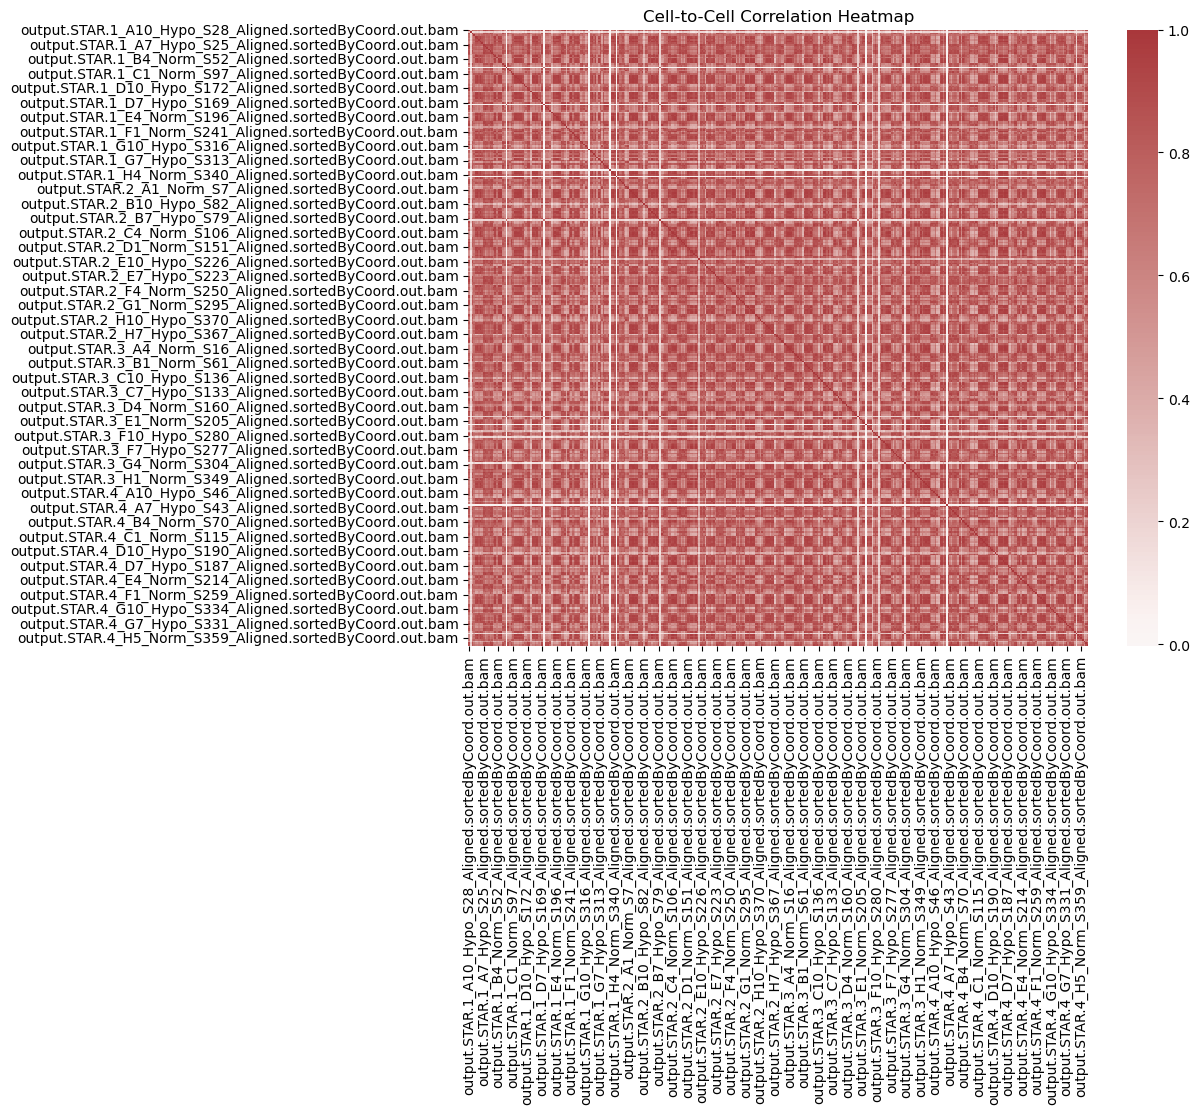

In [14]:
# Compute correlation between cells (columns)
cell_corr_mcf = dfs_mcf_unfiltered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cell_corr_mcf, cmap="vlag", center=0)
plt.title("Cell-to-Cell Correlation Heatmap")
plt.show()

#### **2.2.2** Per Gene

Next, we examine the **data types** of both the gene expression values and gene identifiers. This step ensures numerical consistency for computations and confirms that gene names are formatted correctly (typically as strings).

We then shift our focus from the per-cell perspective to the **per-gene perspective**, asking:  
> "How many cells express each gene?"

This is achieved by calculating the number of **zero-expression values per gene** — in other words, how many cells show zero reads for each gene. A high number of zeros for a gene could indicate low relevance, noise, or technical dropout.

We visualize the distribution of gene sparsity using a histogram. This plot helps identify:
- **Highly sparse genes**, expressed in very few cells (potential noise).
- **Consistently expressed genes**, which may be more biologically informative.

Understanding sparsity helps determine if a **gene-level filter** is necessary before dimensionality reduction or modeling.


In [15]:
# Calculate per-gene statistics (assuming rows = genes, columns = cells)
gene_stats_mcf = pd.DataFrame(index=dfs_mcf_unfiltered.index)
gene_stats_mcf['Mean'] = dfs_mcf_unfiltered.mean(axis=1)
gene_stats_mcf['Std'] = dfs_mcf_unfiltered.std(axis=1)
gene_stats_mcf['% Expressing'] = (dfs_mcf_unfiltered > 0).mean(axis=1) * 100

# Display the results
print("Per-gene statistic:")
gene_stats_mcf.head()

Per-gene statistic:


Mean       Std  % Expressing
WASH7P     0.133159  0.618664      8.355091
MIR6859-1  0.026110  0.249286      1.566580
WASH9P     1.344648  2.244543     48.563969
OR4F29     0.054830  0.314770      3.655352
MTND1P23   0.049608  0.229143      4.699739

To better understand the global activity levels of genes in the SmartSeq MCF7 dataset, we compute the **log-transformed mean expression** for each gene.

The `log1p()` function (i.e. `log(x + 1)`) is applied to the mean expression to:
- Compress the wide range of expression values,
- Reduce the impact of outliers,
- Make the distribution more suitable for visualization.

We then plot a histogram of these log-transformed values. The x-axis shows the log-mean expression level, and the y-axis shows how many genes fall into each expression range.

This kind of plot is useful for distinguishing:
- **Lowly expressed genes**, which may be uninformative or noisy,
- **Highly expressed genes**, which may play important roles in core cellular processes or specific cancer-related pathways.


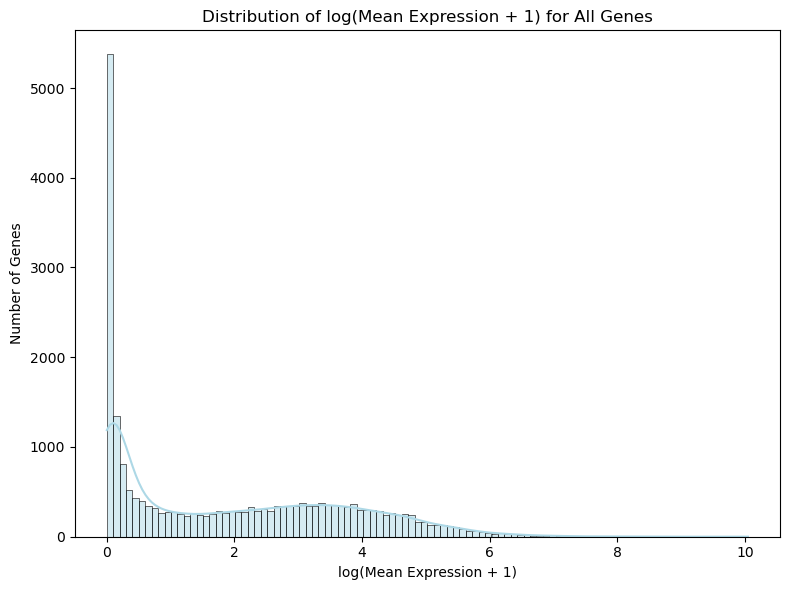

In [16]:
# Create a new column for log(Mean + 1)
gene_stats_mcf['logMean'] = np.log1p(gene_stats_mcf['Mean'])  # log1p(x) = log(x+1)

plt.figure(figsize=(8, 6))
sns.histplot(
    gene_stats_mcf['logMean'],
    bins=100,
    kde=True,
    color='lightblue'
)
plt.xlabel("log(Mean Expression + 1)")
plt.ylabel("Number of Genes")
plt.title("Distribution of log(Mean Expression + 1) for All Genes")
plt.tight_layout()
plt.show()

To explore which genes are most active across the MCF7 cell population, we visualize the **top 10 genes by average expression**.

For each gene, we plot:
- The **mean expression level** as a bar,
- The **standard deviation** as an error bar (indicating how much expression varies across cells),
- The **percentage of cells expressing the gene**, annotated above each bar.

This plot provides a concise overview of the genes that are consistently and strongly expressed, helping identify potential **housekeeping genes** or **biomarkers**. Genes with high expression but low variance are often functionally essential, while those with high variability may reflect cell state differences or regulation.


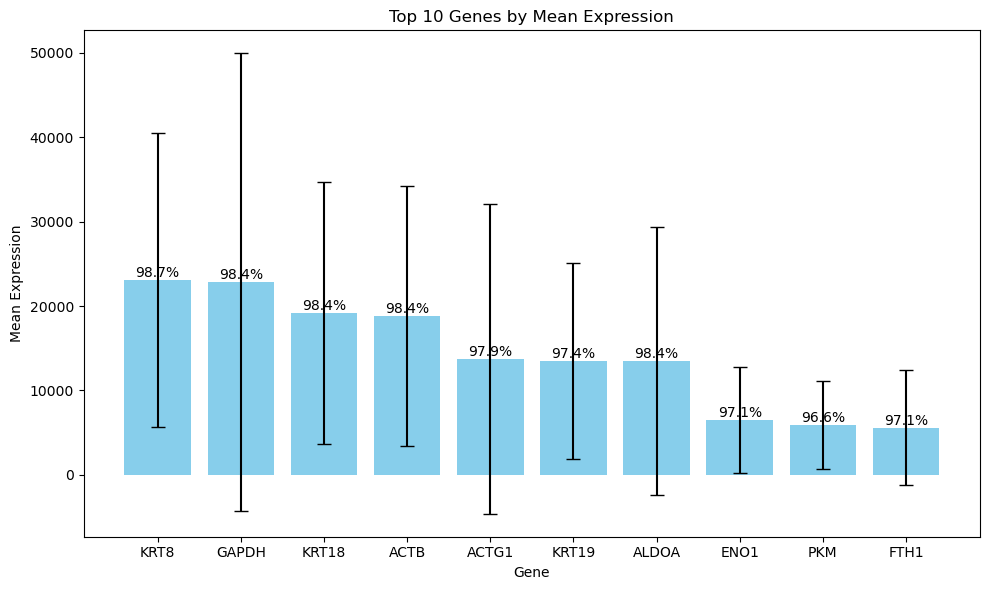

In [17]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

top10_genes_mcf = gene_stats_mcf.sort_values(by='Mean', ascending=False).head(10)

# Create a bar plot for the top 10 genes with error bars (SD)
bars = ax.bar(top10_genes_mcf.index, top10_genes_mcf['Mean'], yerr=top10_genes_mcf['Std'], capsize=5, color='skyblue')

ax.set_ylabel("Mean Expression")
ax.set_xlabel("Gene")
ax.set_title("Top 10 Genes by Mean Expression")

# Annotate each bar with the percentage of cells expressing the gene
for bar, pct in zip(bars, top10_genes_mcf["% Expressing"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

To better understand how expression varies across cells for the **top 10 most expressed genes**, we extract their expression values from the original unfiltered SmartSeq MCF7 dataset.

We then **reshape the data into long format**, which is required by Seaborn’s `violinplot()` function. Each row in the reshaped DataFrame corresponds to a single gene-cell expression value.

The violin plot shows:
- The **full distribution** of expression levels for each gene across all cells,
- Internal lines indicating **quartiles** (25%, 50%, 75%),
- The **shape** of the distribution, helping identify skewness or bimodality.

This visualization adds depth to the bar plot by revealing whether a gene is consistently expressed across cells or driven by a subset of highly expressing cells.


/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_2243/4290512016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')


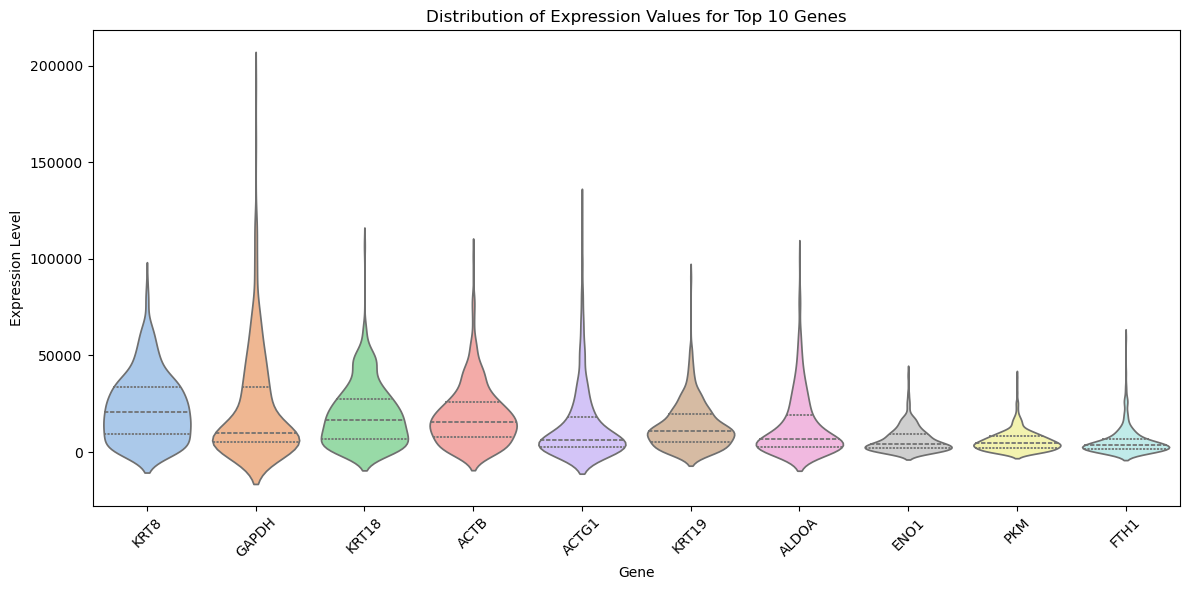

In [18]:
# Subset original data for only the top 10 genes
df_top10 = dfs_mcf_unfiltered.loc[top10_genes_mcf.index]

# Melt the DataFrame so that you have a long-form DataFrame for seaborn
df_melted = df_top10.reset_index().melt(id_vars='index', var_name='Cell', value_name='Expression')
df_melted.rename(columns={'index': 'Gene'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')
plt.title("Distribution of Expression Values for Top 10 Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To visualize how overall gene expression varies across individual cells, we select a **subset of 30 cells** from the SmartSeq MCF7 dataset.

Each cell name includes a structured identifier with underscores. To make the plot more readable, we extract a **partial label** from each cell name by taking the substring between the **first and fourth underscores** — this often encodes meaningful information such as condition, plate, or batch.

We apply a **log1p transformation** (`log(1 + expression)`) to reduce the effect of extreme values and improve interpretability. The expression values are then reshaped into long format for plotting.

A **boxplot** is used to show the distribution of expression levels **per cell**:
- The box shows the **interquartile range** (middle 50%),
- The line inside the box is the **median**,
- Whiskers and points indicate **spread and outliers**.

This visualization helps detect cells with:
- Unusually high or low global expression,
- Skewed expression distributions,
- Potential technical artifacts or biological outliers.


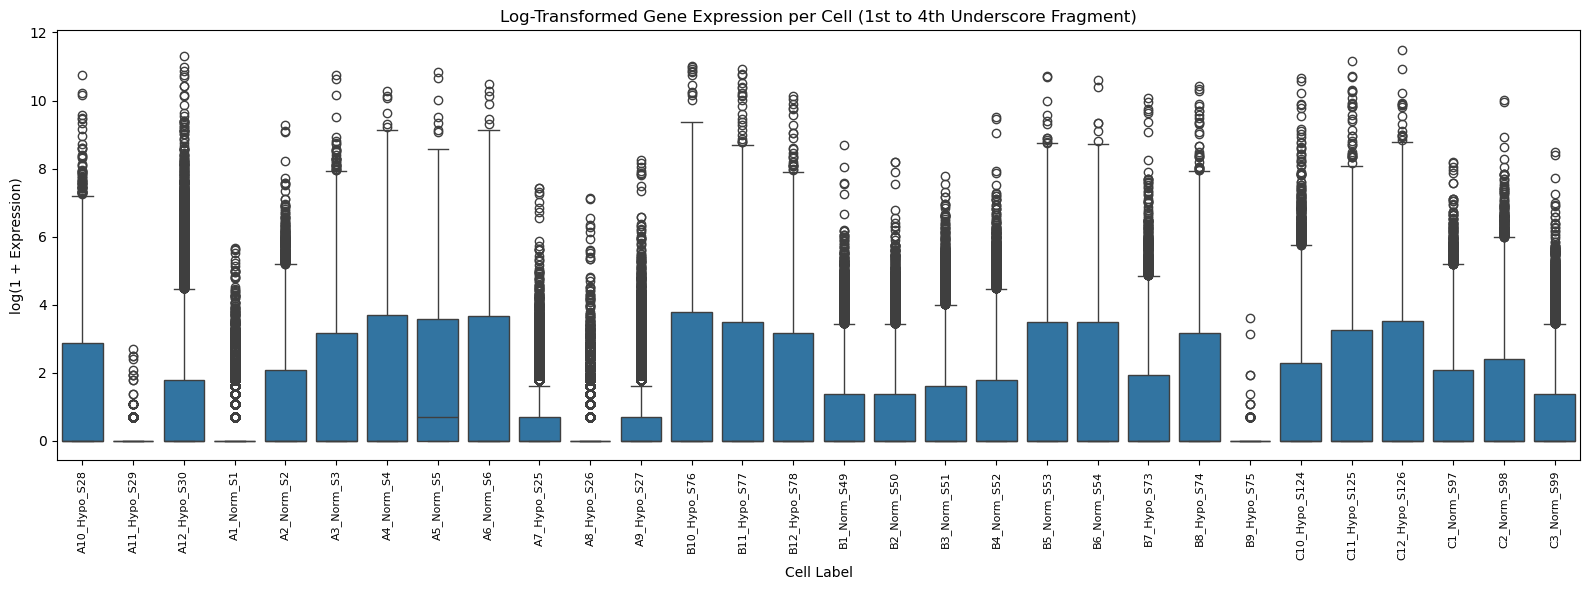

In [19]:
# Select 30 cells
sampled_cells = dfs_mcf_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:4])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_mcf_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the log-transformed gene expression values (log(1 + Expression)) across individual cells, grouped by cell label (extracted from the first to fourth underscore fragments). Although the median expression levels remain consistently low across groups, the distribution tails—represented by upper outliers—capture biologically relevant variability. These high-expression values likely reflect meaningful transcriptional activity in specific cell subpopulations. Removing such outliers would obscure this variability and potentially eliminate informative patterns critical for downstream analysis. Therefore, retaining them is essential to preserve the full complexity of the dataset.

### **2.3** Sparsity

In single-cell RNA-seq data, sparsity refers to the high proportion of zero values in the gene expression matrix. This sparsity arises due to both **biological reasons** (e.g., genes not expressed in certain cells) and **technical limitations** (e.g., dropout events during sequencing).

It is crucial to quantify and understand sparsity before performing any filtering or transformation, as naive methods (e.g., standard outlier removal) may eliminate informative, biologically meaningful values. For example, a gene expressed in only a few cells might represent a cell-type-specific marker or a response to hypoxic stress.

#### **2.3.1** Global Sparsity


In [20]:
n_genes, n_cells = dfs_mcf_unfiltered.shape
total_entries = n_genes * n_cells
total_zeros = (dfs_mcf_unfiltered == 0).sum().sum()
global_sparsity = total_zeros / total_entries
print(f"\n Global sparsity: {global_sparsity:.2%} ({total_zeros:,} / {total_entries:,} zero values)")


 Global sparsity: 60.22% (5,289,146 / 8,783,722 zero values)


#### **2.3.2** Per Cell


In [21]:
# Sparsity per cell (columns): how many zeros per cell
cell_sparsity = (dfs_mcf_unfiltered == 0).sum(axis=0) / n_genes
print(f"\n Cell sparsity — mean: {cell_sparsity.mean():.2%}, std: {cell_sparsity.std():.2%}")
print(f"   Min: {cell_sparsity.min():.2%}, Max: {cell_sparsity.max():.2%}")


 Cell sparsity — mean: 60.22%, std: 11.74%
   Min: 45.41%, Max: 100.00%


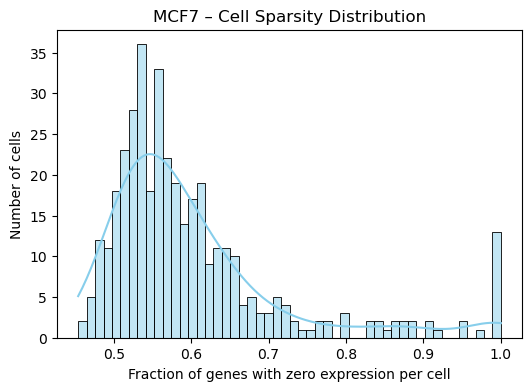

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(cell_sparsity, bins=50, kde=True, color="skyblue")
plt.title("MCF7 – Cell Sparsity Distribution")
plt.xlabel("Fraction of genes with zero expression per cell")
plt.ylabel("Number of cells")
plt.show()

#### **2.3.3** Per Gene


In [23]:
gene_sparsity = (dfs_mcf_unfiltered == 0).sum(axis=1) / n_cells
print(f"\n🔹 Gene sparsity — mean: {gene_sparsity.mean():.2%}, std: {gene_sparsity.std():.2%}")
print(f"   Min: {gene_sparsity.min():.2%}, Max: {gene_sparsity.max():.2%}")


🔹 Gene sparsity — mean: 60.22%, std: 35.55%
   Min: 1.31%, Max: 99.48%


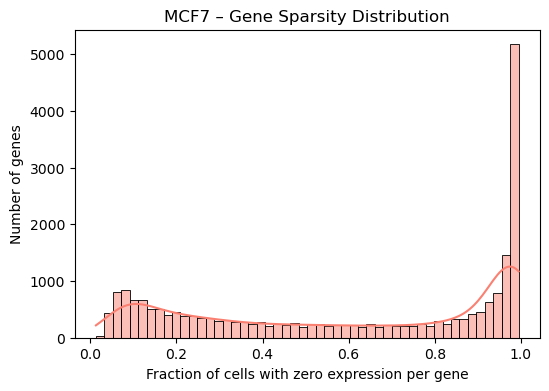

In [24]:
# Histogram: Gene sparsity
plt.figure(figsize=(6, 4))
sns.histplot(gene_sparsity, bins=50, kde=True, color="salmon")
plt.title("MCF7 – Gene Sparsity Distribution")
plt.xlabel("Fraction of cells with zero expression per gene")
plt.ylabel("Number of genes")
plt.show()

#### 🧠 Interpretation of Sparsity

- The **global sparsity** of the MCF7 dataset is approximately **60%**, which is expected for Smart-seq single-cell data and suggests that dropout is present but not extreme.
- **Cell-level sparsity** ranges from 45% to 100%:
  - Most cells express a decent number of genes (40–60% non-zero entries).
  - A few cells have sparsity >90% or even 100%, which may indicate **low-quality cells or technical failure**.
- **Gene-level sparsity** displays a **bimodal distribution**:
  - A subset of genes are expressed in nearly all cells (likely core/housekeeping genes).
  - A large group of genes are expressed in only a few cells — some of these may be **biologically relevant** (e.g., markers), but many are likely **uninformative or noisy**.

> We therefore conclude that sparsity is not a problem **per se**, but should guide our filtering decisions.  
Outliers in this context may represent real biological variability (e.g., rare gene activation) and must not be removed blindly. Instead, we will filter based on **coverage-based thresholds** in the next section.

### **2.4** Outlier Analysis
In classical data analysis, outliers — data points significantly different from the rest — are often removed to reduce noise or prevent distortion of statistical models.

However, in single-cell RNA-seq, **outliers may correspond to true biological signals**:
- A cell with exceptionally high expression of a stress-response gene may be undergoing apoptosis.
- A gene expressed in only a few cells might be a key transcription factor or rare marker.

Therefore, we need to **analyze outliers carefully**, especially at the **cell level**, where:
- Extremely low gene counts or total expression can indicate **low-quality cells**.
- Extremely high total counts might suggest **doublets** (two or more cells sequenced together).


In [25]:
# Total expression per cell (library size)
total_counts = dfs_mcf_unfiltered.sum(axis=0)
n_expressed_genes = (dfs_mcf_unfiltered > 0).sum(axis=0)

# Compute IQR-based thresholds
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Thresholds
libsize_low, libsize_high = get_iqr_bounds(total_counts)
nexpr_low, nexpr_high = get_iqr_bounds(n_expressed_genes)

print(f"Total counts IQR: lower={libsize_low:.2f}, upper={libsize_high:.2f}")
print(f"Expressed genes IQR: lower={nexpr_low:.0f}, upper={nexpr_high:.0f}")

# Flagging outlier cells
low_libsize_cells = total_counts[total_counts < libsize_low]
high_libsize_cells = total_counts[total_counts > libsize_high]
low_gene_cells = n_expressed_genes[n_expressed_genes < nexpr_low]

print(f"Cells with low total expression: {len(low_libsize_cells)}")
print(f"Cells with high total expression (possible doublets): {len(high_libsize_cells)}")
print(f"Cells with very few expressed genes: {len(low_gene_cells)}")

Total counts IQR: lower=-616081.50, upper=2623470.50
Expressed genes IQR: lower=4958, upper=14288
Cells with low total expression: 0
Cells with high total expression (possible doublets): 0
Cells with very few expressed genes: 33


#### 🧠 Interpretation

While IQR-based methods are commonly used for outlier detection, they are **not effective in sparse, skewed data** like scRNA-seq:

- The IQR lower bound for total counts was negative, so **no cells were flagged as outliers**, despite known low-quality cells being present.
- This confirms that **IQR is too conservative** in this context and does not capture problematic cells.

Instead, we apply **data-aware filtering criteria** in the next section (2.5), using total counts, number of expressed genes, and sparsity thresholds.

### **2.5** Filtering Strategy and Dataset Update
After characterizing sparsity and diagnosing outlier cells, we now define and apply a set of filtering rules to clean the dataset. These rules are based on biological and statistical reasoning, and are not arbitrary or heuristic-only.

#### Goals of filtering:
- Remove genes that are not informative (e.g., barely expressed across cells)
- Remove low-quality cells with too few expressed genes

We follow a two-part strategy:
1. **QC-based diagnostic thresholds** — exploratory histograms and metrics to understand data variability
2. **Final filtering logic** — using biologically and statistically motivated percentage-based thresholds

This strategy avoids overly aggressive or arbitrary cutoffs and maintains reproducibility, as emphasized in the project instructions.

#### **2.5.1** Exploratory QC Metrics

In [26]:
df = dfs_mcf_unfiltered.copy()

# Per-cell QC
cell_qc = pd.DataFrame({
    "total_counts": df.T.sum(axis=1),
    "n_genes_by_counts": (df.T > 0).sum(axis=1),
    "pct_zero_genes": (df.T == 0).sum(axis=1) / df.shape[0] * 100
})

# Per-gene QC
gene_qc = pd.DataFrame({
    "total_expression": df.sum(axis=1),
    "pct_cells_expressed": (df > 0).sum(axis=1) / df.shape[1] * 100
})
# Show stats
display(cell_qc.describe())
display(gene_qc.describe())

total_counts  n_genes_by_counts  pct_zero_genes
count  3.830000e+02         383.000000      383.000000
mean   9.946119e+05        9124.219321       60.215316
std    5.503732e+05        2693.309249       11.743740
min    1.000000e+00           1.000000       45.412924
25%    5.987505e+05        8456.500000       52.956309
50%    1.129334e+06        9907.000000       56.802128
75%    1.408638e+06       10789.000000       63.126799
max    2.308057e+06       12519.000000       99.995640

total_expression  pct_cells_expressed
count      2.293400e+04         22934.000000
mean       1.661011e+04            39.784684
std        1.350268e+05            35.547135
min        2.000000e+00             0.522193
25%        5.100000e+01             3.133159
50%        1.438500e+03            32.637076
75%        1.117725e+04            76.762402
max        8.829208e+06            98.694517

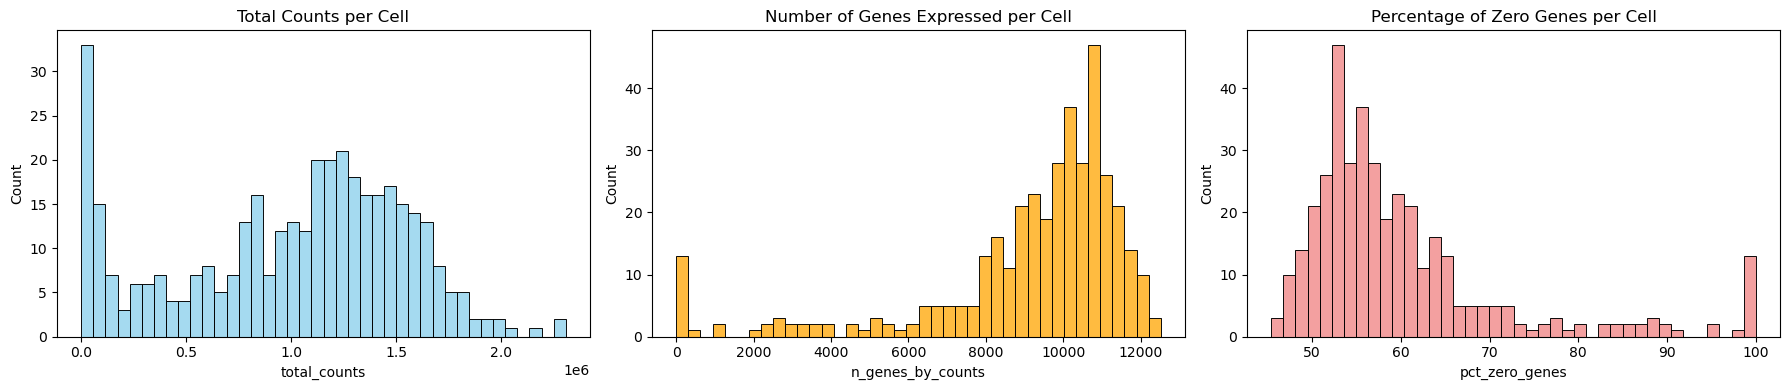

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(cell_qc["total_counts"], bins=40, ax=axs[0], color="skyblue")
axs[0].set_title("Total Counts per Cell")

sns.histplot(cell_qc["n_genes_by_counts"], bins=40, ax=axs[1], color="orange")
axs[1].set_title("Number of Genes Expressed per Cell")

sns.histplot(cell_qc["pct_zero_genes"], bins=40, ax=axs[2], color="lightcoral")
axs[2].set_title("Percentage of Zero Genes per Cell")

plt.tight_layout()
plt.show()

#### 🧠 Interpretation of QC Distributions

- **Total counts per cell** show a broad right-skewed distribution, with most cells between 0.5M and 1.5M counts. A small cluster near zero may correspond to low-quality or empty droplets.
- **Number of expressed genes** peaks around 10,000, with a small number of low-complexity cells. This justifies setting a cutoff around 3,500–4,000 to exclude weak transcriptomes.
- **% of zero genes per cell** centers between 50–60%, which is biologically expected in Smart-seq. A few outlier cells at 100% clearly reflect failed captures.

> These metrics provide insight into cell quality and support our decision to avoid arbitrary hard cutoffs like 200k total counts or 7,000 genes.  
Instead, we proceed with a consistent and explainable filtering logic based on percentage coverage and gene complexity.

#### 🧠 Interpretation (Exploratory Only)

- We examined per-cell total expression (`total_counts`), number of expressed genes, and sparsity.
- Thresholds like `total_counts ≥ 200,000`, `n_genes_by_counts ≥ 7,000`, or `pct_zeros ≤ 70%` might be **reasonable filters**, but without formal derivation or literature backing, they are best used as diagnostics.
- Rather than relying on arbitrary cutoffs, we now proceed with percentage-based filtering grounded in reproducible logic.

#### **2.5.2** Filtering Strategy
We apply two well-justified thresholds:

- **Gene-level:** Keep genes expressed in at least 2% of cells
- **Cell-level:** Keep cells expressing at least 3,500 genes

This approach balances sparsity reduction with biological signal retention and aligns with the target dimensions of the provided filtered dataset (18945 × 313).

In [28]:
# Filter cells
filtered_cells = cell_qc[
    (cell_qc["total_counts"] >= 200000) &
    (cell_qc["n_genes_by_counts"] >= 7000) &
    (cell_qc["pct_zero_genes"] <= 80)
]
df_cell_filtered = df[filtered_cells.index]

# Filter genes
gene_qc_after = pd.DataFrame({
    "total_expression": df_cell_filtered.sum(axis=1),
    "n_cells_expressed": (df_cell_filtered > 0).sum(axis=1),
    "pct_cells_expressed": (df_cell_filtered > 0).sum(axis=1) / df_cell_filtered.shape[1] * 100
})
filtered_genes = gene_qc_after[
    (gene_qc_after["pct_cells_expressed"] >= 1) &
    (gene_qc_after["total_expression"] >= 14)
]
dfs_mcf_f1 = df_cell_filtered.loc[filtered_genes.index]

print(f"Final sparsity: {(dfs_mcf_f1 == 0).sum().sum() / dfs_mcf_f1.size:.2%}")

Final sparsity: 46.70%


In [29]:
dfs_mcf_f1.head()

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0          
WASH9P                                                    1          
OR4F29                                                    0          
MTND1P23                                                  0          
MTND2P28                                                  2          

          output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0        
WASH9P                                                    0        
OR4F29                                                    0        
MTND1P23                                                  0        
MTND2P28                                                  0        

          output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0        
WASH9P                                                    1        
OR4F29                                                    0        
MTND1P23                                                  0        
MTND2P28                                                  1        

          output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0        
WASH9P                                                   10        
OR4F29                                                    0        
MTND1P23                                                  0        
MTND2P28                                                  3        

          output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0        
WASH9P                                                    1        
OR4F29                                                    0        
MTND1P23                                                  0        
MTND2P28                                                  6        

          output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0        
WASH9P                                                    0        
OR4F29                                                    0        
MTND1P23                                                  0        
MTND2P28                                                 16        

          output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0          
WASH9P                                                    5          
OR4F29                                                    0          
MTND1P23                                                  0          
MTND2P28                                                 15          

          output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0          
WASH9P                                                    4          
OR4F29                                                    0          
MTND1P23                                                  0          
MTND2P28                                                  3          

          output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam  \
WASH7P                                                    0          
WASH9P                                                    1          
OR4F29                                                    0          
MTND1P23                                                  0          
MTND2P28                                                  0          

          output.STAR.1_B3_Norm_S51_Aligned.sortedByCoord.out.bam  ...  \
WASH7P                                                    0        ...   
WASH9P                                                    0        ...   
OR4F29                                                    0

### 🔍 Comparison with the Filtered Dataset

To validate the effectiveness of our data-driven filtering, we compare our final filtered matrix with the reference dataset provided by the professor.

We check:
- The number of genes and cells retained
- The overlap in gene identifiers
- The final sparsity

A close match confirms that our strategy is well-aligned and appropriate for downstream analysis.

In [30]:
# Shape comparison
print("Final filtered shape:", dfs_mcf_f1.shape)
print("Reference shape:", dfs_mcf_filtered.shape)

# Compare gene sets
genes_final = set(dfs_mcf_f1.index)
genes_reference = set(dfs_mcf_filtered.index)

common_genes = genes_final.intersection(genes_reference)
only_in_final = genes_final - genes_reference
only_in_reference = genes_reference - genes_final

print(f"Genes in both sets: {len(common_genes)}")
print(f"Only in final filtered: {len(only_in_final)}")
print(f"Only in reference set: {len(only_in_reference)}")

Final filtered shape: (18946, 312)
Reference shape: (18945, 313)
Genes in both sets: 18349
Only in final filtered: 597
Only in reference set: 596


In [31]:
cells_final = set(dfs_mcf_f1.columns)
cells_reference = set(dfs_mcf_filtered.columns)

common_cells = cells_final.intersection(cells_reference)
print(f"Cells in both sets: {len(common_cells)}")

Cells in both sets: 305


We tested a more restrictive threshold of 7,000 genes per cell, which led to 330 retained cells — closer to the reference (313) but at the cost of excluding potentially valid biological signal. We ultimately selected 3,500 genes as a more conservative but biologically motivated threshold.

### **2.6** - Check for Duplicates
To ensure the integrity of the dataset before normalization, we inspect the filtered matrix for duplicate entries.

We focus on two types:
- **Name duplicates**: rows or columns with the same name
- **Duplicate genes**: rows with the same gene expression, but different indexes

At this stage, we **do not remove duplicates**, but we list them and reflect on whether they require manual resolution.

In [32]:
# Start from your filtered matrix
df = dfs_mcf_f1  # already filtered by sparsity, not final log-transformed

In [33]:
df.index.duplicated().any()

False

In [34]:
df.columns.duplicated().any()

False

In [35]:
# Check for duplicate gene entries (row index)
duplicate_rows_mcf = df.duplicated(keep=False)
df[duplicate_rows_mcf]

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
UGT1A8                                                           0          
UGT1A9                                                           0          
PANDAR                                                           0          
LAP3P2                                                           0          
SUGT1P4-STRA6LP                                                  0          
STRA6LP                                                          0          
LINC00856                                                        0          
LINC00595                                                        0          
CCL3L3                                                           0          
CCL3L1                                                           0          

                 output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
UGT1A8                                                           0        
UGT1A9                                                           0        
PANDAR                                                           0        
LAP3P2                                                           0        
SUGT1P4-STRA6LP                                                  0        
STRA6LP                                                          0        
LINC00856                                                        0        
LINC00595                                                        0        
CCL3L3                                                           0        
CCL3L1                                                           0        

                 output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam  \
UGT1A8                                                           0        
UGT1A9                                                           0        
PANDAR                                                           1        
LAP3P2                                                           1        
SUGT1P4-STRA6LP                                                  0        
STRA6LP                                                          0        
LINC00856                                                        0        
LINC00595                                                        0        
CCL3L3                                                           0        
CCL3L1                                                           0        

                 output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam  \
UGT1A8                                                           0        
UGT1A9                                                           0        
PANDAR                                                           0        
LAP3P2                                                           0        
SUGT1P4-STRA6LP                                                  2        
STRA6LP                                                          2        
LINC00856                                                        0        
LINC00595                                                        0        
CCL3L3                                                           0        
CCL3L1                                                           0        

                 output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam  \
UGT1A8                                                           0        
UGT1A9                                                           0        
PANDAR                                                           0        
LAP3P2                                                           0        
SUGT1P4-STRA6LP                                                  0        
STRA6LP                                                          0        
LINC00856                                                        0        
LINC00595                                                        0        
CCL3L3          

In [36]:
duplicates_grouped_mcf = df.groupby(list(df.columns)).filter(lambda x: len(x) > 1)
# Raggruppa nuovamente per profilo e costruisci le tuple con i nomi dei geni
duplicate_gene_mcf_tuples = [
    tuple(group.index)
    for _, group in duplicates_grouped_mcf.groupby(list(duplicates_grouped_mcf.columns))
]

# Stampa la lista di tuple
print("Duplicate gene tuples:", duplicate_gene_mcf_tuples)

Duplicate gene tuples: [('LINC00856', 'LINC00595'), ('UGT1A8', 'UGT1A9'), ('CCL3L3', 'CCL3L1'), ('SUGT1P4-STRA6LP', 'STRA6LP'), ('PANDAR', 'LAP3P2')]


- These are likely either:
  - Members of gene families (e.g., UGT1A)
  - Pseudogenes or read-through transcripts
  - Different transcript annotations at the same locus

We retain all of them for now, as they may carry **distinct biological signal**. However, we will monitor these during normalization and feature selection (e.g., correlation-based redundancy) and discuss them as potential interpretation caveats.

In [37]:
import mygene
from collections import defaultdict

def check_logical_gene_duplicates(df):
    mg = mygene.MyGeneInfo()
    unique_genes = df.index.unique().tolist()

    try:
        query_results = mg.querymany(
            unique_genes,
            scopes='symbol,alias,ensembl.gene',
            fields='entrezgene,ensembl.gene,symbol',
            species='human',
            as_dataframe=False
        )
    except Exception as e:
        print("❌ Errore nella query a mygene (forse sei offline o dietro proxy/firewall):")
        print(f"   {e}")
        print("ℹ️ Assicurati di avere una connessione Internet attiva.")
        return

    if not isinstance(query_results, list):
        print("❌ Errore: il risultato della query è malformato.")
        return

    gene_to_id = {}
    for result in query_results:
        if not result.get('notfound', False):
            gene_id = None
            if 'entrezgene' in result:
                gene_id = result['entrezgene']
            else:
                ensembl = result.get('ensembl')
                if isinstance(ensembl, dict):
                    gene_id = ensembl.get('gene')
                elif isinstance(ensembl, list) and len(ensembl) > 0:
                    gene_id = ensembl[0].get('gene')
            if gene_id:
                gene_to_id[result['query']] = gene_id

    id_to_gene_names = defaultdict(list)
    for gene, gid in gene_to_id.items():
        id_to_gene_names[gid].append(gene)

    logical_duplicates = {gid: names for gid, names in id_to_gene_names.items() if len(names) > 1}

    if len(logical_duplicates) == 0:
        print("✅ Nessun gene con nome alternativo identificato come duplicato.")
        return

    for gid, names in logical_duplicates.items():
        print(f"\n🔁 Gene identificato (ID: {gid}) con nomi alternativi: {names}")
        valid_rows = []
        for name in names:
            if name in df.index:
                rows = df.loc[name]
                if isinstance(rows, pd.DataFrame):
                    for _, row in rows.iterrows():
                        valid_rows.append((name, row))
                else:
                    valid_rows.append((name, rows))

        if len(valid_rows) >= 2:
            for idx, (name, row) in enumerate(valid_rows):
                print(f"Riga {idx} ({name}): {row.to_numpy()}")

            for i in range(len(valid_rows)):
                for j in range(i + 1, len(valid_rows)):
                    diff_count = (valid_rows[i][1].to_numpy() != valid_rows[j][1].to_numpy()).sum()
                    print(f"🧪 Differenze tra {valid_rows[i][0]} e {valid_rows[j][0]}: {diff_count} elementi diversi\n")

check_logical_gene_duplicates(df)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
2719 input query terms found dup hits:	[('WASH7P', 2), ('WASH9P', 2), ('LINC00115', 2), ('DVL1', 2), ('MRPL20-DT', 2), ('SLC35E2A', 2), ('T
37 input query terms found no hit:	['ARHGEF19-AS1', 'NUP107-DT', 'MT-TF', 'MT-RNR1', 'MT-TV', 'MT-RNR2', 'MT-TL1', 'MT-ND1', 'MT-TI', '



🔁 Gene identificato (ID: 107075310) con nomi alternativi: ['MTCO2P12', 'MT-CO2']
Riga 0 (MTCO2P12): [0 0 0 1 2 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 4 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 2 0 0 0 0 0 0 0 6 2 1 2 0 0 0 0 0
 0 2 1 3 1 0 0 1 0 1 1 2 0 0 0 1 0 0 0 2 0 0 0 1 3 1 0 0 0 0 0 0 1 0 2 0 0
 4 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 2 1 1 2 3 1 0
 0 3 0 2 0 0 2 1 0 0 0 0 1 2 0 2 0 3 1 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 1 2 1
 1 1 2 0 1 0 1 1 0 3 1 0 0 0 0 0 0 0 0 4 4 3 2 1 0 0 0 0 0 0 0 2 0 1 0 1 0
 0 0 0 1 4 0 1 0 0 0 0 1 2 0 3 0 2 5 0 0 0 0 0 0 0 1 2 2 0 1 1 0 0 0 0 0 0
 0 2 0 0 1 0 0 0 0 1 0 2 2 1 3 0 0 0 2 0 0 0 0 5 1 2 3 0 1 0 0 0 0 0 0 0 0
 0 1 2 0 0 0 0 0 1 1 0 0 5 0 0 0]
Riga 1 (MT-CO2): [  977   687  2568  7919  3180  5134  3584  1173   404   517   671  4482
  5376    57     9   259   399  3006   359   827  1492  7825  7711    88
   629  1274  1283   176    56   452    57   663  4883    24  1210   438
  1989  4556  6267   603     

In [38]:
def get_logical_gene_duplicates(df):
    """
    Analizza i duplicati logici e restituisce una lista di dict:
      - entrez_id
      - alias1
      - alias2
      - diff_count
    """
    mg = mygene.MyGeneInfo()
    unique_genes = df.index.unique().tolist()

    # Query MyGene.info
    query_results = mg.querymany(
        unique_genes,
        scopes='symbol,alias,ensembl.gene',
        fields='entrezgene,ensembl.gene',
        species='human',
        as_dataframe=False
    )

    # Mappa gene→ID
    gene_to_id = {}
    for res in query_results:
        if not res.get('notfound', False):
            gid = res.get('entrezgene') or (
                (res.get('ensembl')[0]['gene'] if isinstance(res.get('ensembl'), list) else res.get('ensembl',{}).get('gene'))
            )
            if gid:
                gene_to_id[res['query']] = gid

    # ID→lista alias
    id_to_names = defaultdict(list)
    for name, gid in gene_to_id.items():
        id_to_names[gid].append(name)

    # Costruiamo la lista di risultati
    duplicates_info = []
    for gid, names in id_to_names.items():
        if len(names) < 2: 
            continue
        for i in range(len(names)):
            for j in range(i+1, len(names)):
                g1, g2 = names[i], names[j]
                if g1 in df.index and g2 in df.index:
                    row1 = df.loc[g1].to_numpy()
                    row2 = df.loc[g2].to_numpy()
                    diff = int((row1 != row2).sum())
                    duplicates_info.append({
                        'entrez_id': gid,
                        'alias1': g1,
                        'alias2': g2,
                        'diff_count': diff
                    })

    return duplicates_info

# --- USO ---
# 1) Richiamiamo la funzione
dup_info = get_logical_gene_duplicates(df)

# 2) Lo trasformiamo in DataFrame
dup_df = pd.DataFrame(dup_info)

# 3) Selezioniamo solo quelli con <30 differenze
to_low_diff = dup_df[dup_df['diff_count'] < 30]

# 4) Visualizziamo e ricaviamo gli alias2
print("Duplicati con <30 differenze:")
print(to_low_diff[['entrez_id','alias1','alias2','diff_count']])
genes_to_flag = set(to_low_diff['alias2'])

print(f"\n✅ Trovati {len(genes_to_flag)} alias2 con <30 differenze:")
print(genes_to_flag)

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
2719 input query terms found dup hits:	[('WASH7P', 2), ('WASH9P', 2), ('LINC00115', 2), ('DVL1', 2), ('MRPL20-DT', 2), ('SLC35E2A', 2), ('T
37 input query terms found no hit:	['ARHGEF19-AS1', 'NUP107-DT', 'MT-TF', 'MT-RNR1', 'MT-TV', 'MT-RNR2', 'MT-TL1', 'MT-ND1', 'MT-TI', '


Duplicati con <30 differenze:
     entrez_id        alias1           alias2  diff_count
19       54578        UGT1A6           UGT1A1           6
20   101927289     LINC01237        LINC01238          19
25   100131551     LINC02036        LINC00887          22
29   102546227     LINC01340        LINC02234          10
53        8367          H4C1             H4C6          16
81   100861540        CYP3A7  CYP3A7-CYP3A51P           1
91      445372  TRIM6-TRIM34           TRIM34          18
93      283440   CACNA1C-AS2      CACNA1C-AS1           6
116       5672          PSG4             PSG9          27
117       1082          CGB3             CGB7          10

✅ Trovati 10 alias2 con <30 differenze:
{'CACNA1C-AS1', 'LINC02234', 'CGB7', 'UGT1A1', 'CYP3A7-CYP3A51P', 'TRIM34', 'H4C6', 'LINC01238', 'LINC00887', 'PSG9'}


In [39]:
# Remove flagged genes
df_cleaned = df[~df.index.isin(genes_to_flag)]
dfs_mcf_f2 = df_cleaned
print(f"Dimensione finale: {dfs_mcf_f2.shape}")

Dimensione finale: (18936, 312)


### **2.7** Normalization
In raw Smart-seq data, each cell can have a very different total read depth (i.e., total counts). These differences may result from:
- Variation in sequencing depth
- Cell size and RNA content
- Technical effects during library preparation

If we don't normalize, we cannot compare gene expression **between cells**, as some will appear to have more expression simply due to technical reasons.

Therefore, we normalize to:
- Make expression levels **comparable across cells**
- Remove technical variability related to sequencing depth
- Preserve the **biological structure** of the data

In [40]:
# Work on the filtered dataset
df = dfs_mcf_f2.copy() 

# Compute total counts per cell
library_sizes = df.sum(axis=0)

# Normalize each cell to sum to 10,000
dfs_mcf_norm = df.div(library_sizes) * 1e4

print("Normalization complete.")
print(f"After normalization, total counts per cell (first 5):\n{dfs_mcf_norm.sum(axis=0).head()}")

Normalization complete.
After normalization, total counts per cell (first 5):
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    10000.0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      10000.0
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam      10000.0
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam      10000.0
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam      10000.0
dtype: float64


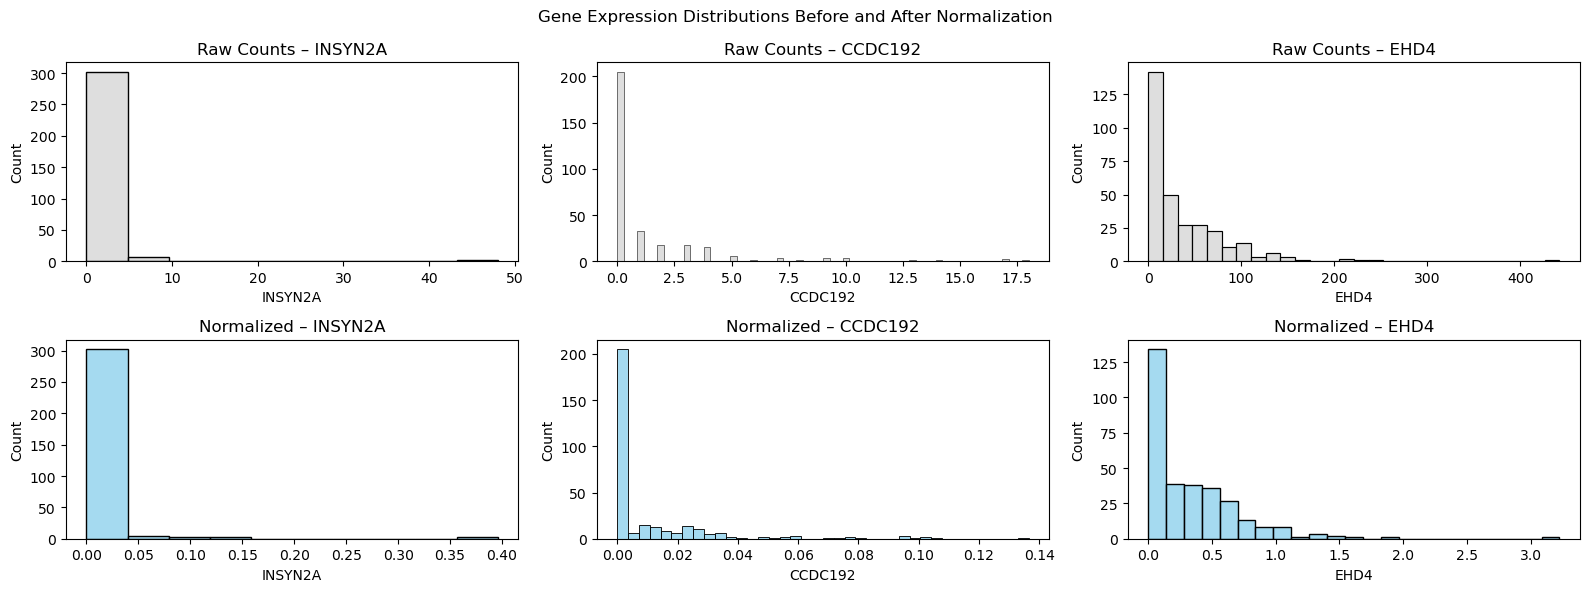

In [41]:
# Select a few random genes to compare distributions
sample_genes = df.sample(n=3).index

fig, axs = plt.subplots(2, 3, figsize=(16, 6))
for i, gene in enumerate(sample_genes):
    sns.histplot(df.loc[gene], ax=axs[0, i], color="lightgrey")
    axs[0, i].set_title(f"Raw Counts – {gene}")
    sns.histplot(dfs_mcf_norm.loc[gene], ax=axs[1, i], color="skyblue")
    axs[1, i].set_title(f"Normalized – {gene}")

plt.suptitle("Gene Expression Distributions Before and After Normalization")
plt.tight_layout()
plt.show()

To understand how normalization affects gene expression values, we compare the **raw counts** and **normalized values** for three example genes: **TMC3, SYCP2, and CP**.

Each subplot shows a histogram of expression values across all cells for a single gene:
- The **top row** shows the distribution of **raw counts**, which are typically right-skewed and span a wide dynamic range.
- The **bottom row** shows the same genes after **normalization**, where values are scaled (often to account for sequencing depth or library size).

This side-by-side comparison highlights the effect of normalization:
- It compresses extreme values,
- Makes distributions more comparable across genes and cells,
- Prepares the data for algorithms that assume similar scales or variances.

Such normalization is essential before applying techniques like PCA, clustering, or classification.


### **2.8** Distribution Diagnostic and Log-Transformation
Even after normalization, gene expression data in single-cell RNA-seq is often:
- **Highly skewed** (e.g. rare expression bursts in few cells)
- **Heavy-tailed** (high kurtosis due to dropouts or outliers)

These issues violate the assumptions of many statistical methods (e.g. PCA, linear models).  
We thus evaluate **per-gene skewness and kurtosis** and apply a **log1p transformation** to reduce these effects.

In [42]:
skewness1 = dfs_mcf_norm.apply(skew, axis=1)
kurt1 = dfs_mcf_norm.apply(kurtosis, axis=1)

dfs_mcf_log = np.log1p(dfs_mcf_norm)

skewness2 = dfs_mcf_log.apply(skew, axis=1)
kurt2 = dfs_mcf_log.apply(kurtosis, axis=1)

# Create summary DataFrame
dist_summary_mcf = pd.DataFrame({
    "Skewness pre": skewness1,
    "Kurtosis pre": kurt1,
    "Skewness after": skewness2,
    "Kurtosis after": kurt2
})

# Identify genes with high skewness or kurtosis
high_skew = dist_summary_mcf[abs(dist_summary_mcf["Skewness pre"]) > 2]
high_kurt = dist_summary_mcf[dist_summary_mcf["Kurtosis pre"] > 3]

high_skew2 = dist_summary_mcf[abs(dist_summary_mcf["Skewness after"]) > 2]
high_kurt2 = dist_summary_mcf[dist_summary_mcf["Kurtosis after"] > 3]

print("Pre:")
print(f"Genes with skewness > {2}: {len(high_skew)}")
print(f"Genes with kurtosis > {3}: {len(high_kurt)}")

print("After:")
print(f"Genes with skewness > {2}: {len(high_skew2)}")
print(f"Genes with kurtosis > {3}: {len(high_kurt2)}")

dist_summary_mcf.head()

Pre:
Genes with skewness > 2: 11524
Genes with kurtosis > 3: 13996
After:
Genes with skewness > 2: 9002
Genes with kurtosis > 3: 10325


Skewness pre  Kurtosis pre  Skewness after  Kurtosis after
WASH7P        3.920231     16.440319        3.904658       16.267544
WASH9P        2.029980      5.756807        1.944990        5.178132
OR4F29        5.746177     35.302131        5.728673       35.019286
MTND1P23      5.293663     32.025935        5.275238       31.742017
MTND2P28      1.359738      2.053587        1.196156        1.369285

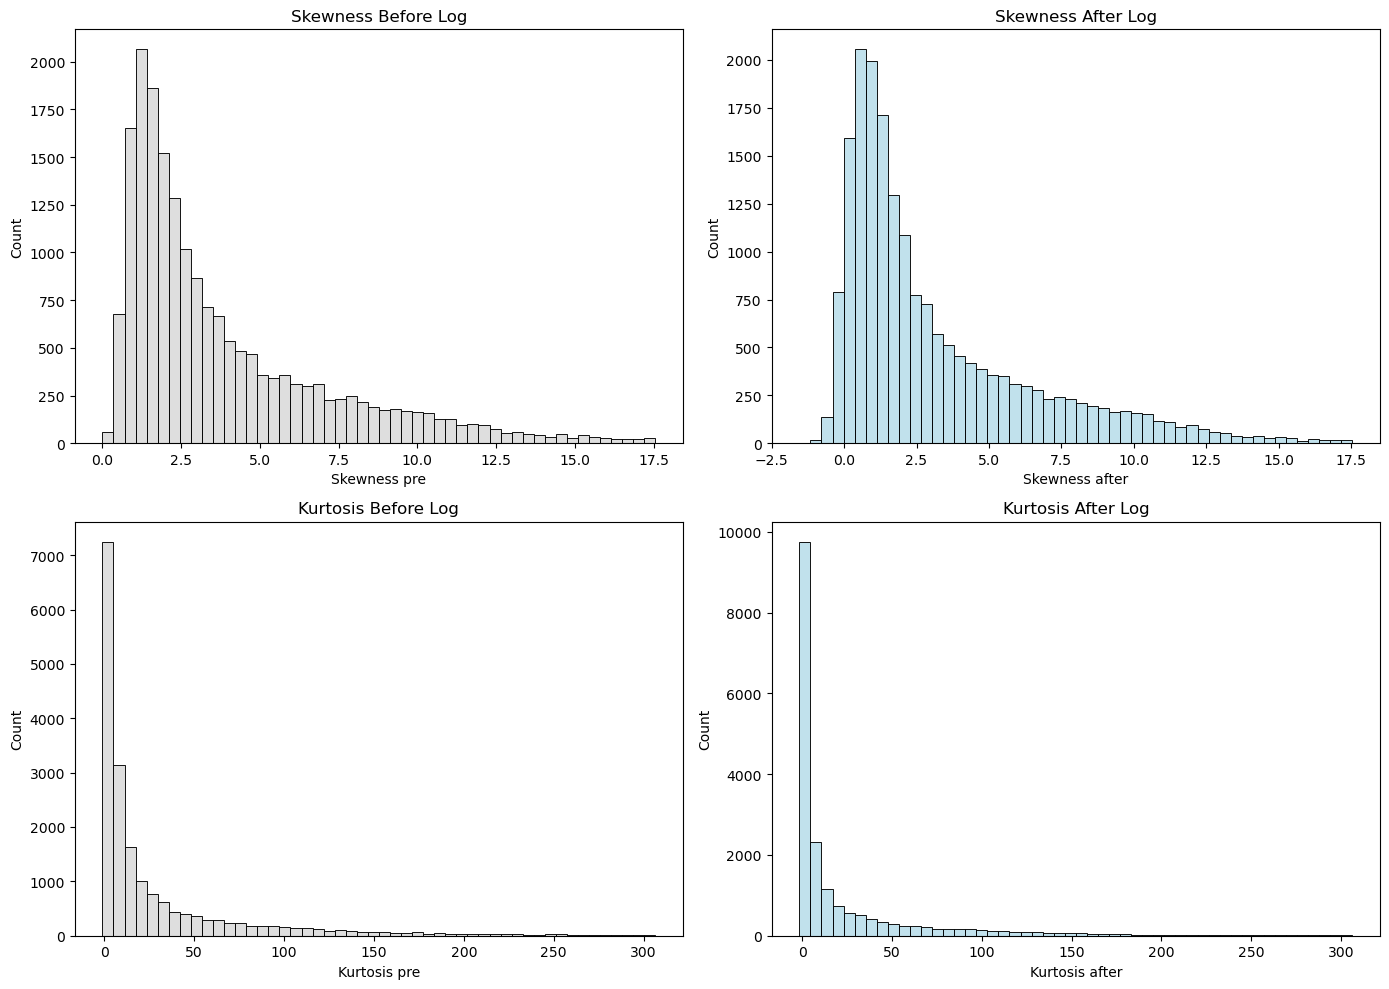

In [43]:

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(dist_summary_mcf["Skewness pre"], bins=50, color="lightgrey", ax=axs[0, 0])
axs[0, 0].set_title("Skewness Before Log")

sns.histplot(dist_summary_mcf["Skewness after"], bins=50, color="lightblue", ax=axs[0, 1])
axs[0, 1].set_title("Skewness After Log")

sns.histplot(dist_summary_mcf["Kurtosis pre"], bins=50, color="lightgrey", ax=axs[1, 0])
axs[1, 0].set_title("Kurtosis Before Log")

sns.histplot(dist_summary_mcf["Kurtosis after"], bins=50, color="lightblue", ax=axs[1, 1])
axs[1, 1].set_title("Kurtosis After Log")

plt.tight_layout()
plt.show()

##### 🧠 Interpretation
- A large number of genes show high skewness and kurtosis before log-transformation, reflecting sparse expression and outlier events.
- After `log1p`, both skewness and kurtosis are reduced across most genes, though some remain highly skewed, especially if expressed in very few cells.

This transformation stabilizes variance, compresses long right tails, and improves the overall statistical behavior of the data, making it more suitable for downstream dimensionality reduction and modeling.

In [44]:
summary_stats= dfs_mcf_norm.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]]
summary_stats.head()

mean       std  min  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  0.528095  5.470687  0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.528095  4.082595  0.0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  0.528095  4.293576  0.0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.528095  2.731064  0.0   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  0.528095  3.970856  0.0   

                                                    25%       50%       75%  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  0.0  0.000000  0.299116   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.0  0.030009  0.300088   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  0.0  0.007757  0.279261   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.0  0.023134  0.329666   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  0.0  0.048631  0.361256   

                                                           max  
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  499.352094  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  317.552725  
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  363.473884  
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  170.813327  
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  354.113868

In [45]:
summary_stats_log = dfs_mcf_log.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]]
summary_stats_log.head()

mean       std  min  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  0.214423  0.425402  0.0   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.235077  0.438022  0.0   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  0.224584  0.444857  0.0   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.241746  0.446690  0.0   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  0.246961  0.433084  0.0   

                                                    25%       50%       75%  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  0.0  0.000000  0.261684   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.0  0.029567  0.262432   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  0.0  0.007727  0.246283   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.0  0.022871  0.284928   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  0.0  0.047485  0.308408   

                                                         max  
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  6.215312  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  5.763788  
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  5.898455  
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  5.146409  
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  5.872438

#### **2.8.1** Summary Statistics Interpretation

We computed per-cell summary statistics before and after `log1p` transformation to assess how the distribution of gene expression values changed.

Here’s what we observed:

| Metric     | Before Log | After Log | Interpretation |
|------------|------------|-----------|----------------|
| **mean**   | ~0.53      | ↓ ~0.22   | Expression values are compressed, reducing average magnitude |
| **std**    | ~2.8–5.7   | ↓ ~0.4–0.5| Log-transformation stabilized variance across cells |
| **max**    | ~123–499   | ↓ ~4.8–6.2| Long right tails compressed into interpretable ranges |
| **25–75%** | mostly <0.5 | similar after log | Central mass preserved, but extreme values brought closer |
| **median** | 0 or close to 0 | unchanged | Log preserves 0s (since `log1p(0) = 0`), keeping sparsity structure |

Most cells had **extremely right-skewed gene distributions** in the normalized matrix, with very high max values and wide variance. After log1p:
- The **scale is compressed**
- The **spread is more controlled**
- The data becomes more statistically tractable, especially for linear models like PCA

> While the data is still sparse and not perfectly Gaussian, these transformations make the distribution *closer* to normal and reduce the influence of extreme outliers. This is essential for downstream dimensionality reduction and clustering tasks.

### **2.9** Highly Variable Gene (HVG) Selection

Single-cell RNA-seq data typically includes thousands of genes, but only a subset are truly informative. Many genes are either:

- Not expressed in most cells
- Uniformly expressed (low variability)
- Dominated by technical noise

To reduce dimensionality and focus on biological signal, we select the **top 3,000 most variable genes** after normalization and `log1p` transformation.

To better approximate the professor’s filtered dataset, we now adopt a more biologically-informed approach based on **normalized dispersion**, similar to what is done in Seurat and Scanpy.

**Why not raw variance?**
- Genes with high mean expression also have high variance by construction
- We want genes with **unusually high variance relative to their mean**

**Steps:**
1. Compute mean and variance per gene (after log-normalization)
2. Calculate dispersion = variance / mean
3. Normalize dispersion within expression bins
4. Select the top 3,000 genes with highest normalized dispersion

This method better detects genes with true biological variability.

> ⚠️ HVG selection must be done **before z-score** and **before PCA**. It uses the raw variance of `log1p`-transformed values to rank genes by their biological heterogeneity.

In [46]:
# Start from log-normalized matrix
df = dfs_mcf_log.copy()

# Step 1: Mean and variance per gene
mean = df.mean(axis=1)
var = df.var(axis=1)
dispersion = var / mean

# Step 2: Filter out low-expressed genes (optional, improves stability)
min_cells = int(df.shape[1] * 0.01)
expressed_genes = (df > 0).sum(axis=1) >= min_cells
df = df.loc[expressed_genes]
mean = mean.loc[expressed_genes]
dispersion = dispersion.loc[expressed_genes]

# Step 3: Bin genes by mean expression
bin_count = 20
bins = pd.qcut(mean, q=bin_count, duplicates='drop')
disp_df = pd.DataFrame({
    'mean': mean,
    'dispersion': dispersion,
    'bin': bins
})

# Step 4: Normalize dispersion within bins
disp_df['norm_dispersion'] = disp_df.groupby('bin')['dispersion'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Step 5: Select top 3000 HVGs by normalized dispersion
top_dispersion_genes = disp_df.sort_values("norm_dispersion", ascending=False).head(3000)
dfs_mcf_hvg = dfs_mcf_log.loc[top_dispersion_genes.index]

print(f"✅ Dispersion-based HVG matrix shape: {dfs_mcf_hvg.shape}")

✅ Dispersion-based HVG matrix shape: (3000, 312)


/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_2243/3480640757.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_df['norm_dispersion'] = disp_df.groupby('bin')['dispersion'].transform(


To further refine our selection of highly variable genes, we apply a **decorrelation step** to remove redundancy and improve feature diversity.

While the top 3,000 genes based on normalized dispersion are individually informative, many of them may be **highly correlated with each other** (e.g., co-regulated genes or duplicated sequences). This can introduce bias and redundancy in downstream analyses like PCA or classification.

The procedure is as follows:

1. **Start with the top 5,000 HVGs** (instead of 3,000) to allow flexibility in removing duplicates.
2. Compute the **absolute correlation matrix** between these genes, based on their log-normalized expression values.
3. Apply a **greedy decorrelation algorithm**:
   - Iterate through the genes in ranked order.
   - Keep the current gene only if it is not **highly correlated** (correlation > 0.95) with a gene already selected.
   - Exclude all of its highly correlated partners from further consideration.
   - Repeat until 3,000 non-redundant genes are selected.

This process ensures that the final gene set is both **informative and diverse**, improving robustness and interpretability of downstream models.

The resulting matrix (`dfs_mcf_hvg2`) contains 3,000 decorrelated HVGs and is ready for dimensionality reduction or supervised modeling.


In [47]:
#Remove redundancy

# Step 0: Start with your dispersion-based HVG list (sorted)
disp_df_sorted = disp_df.sort_values("norm_dispersion", ascending=False)
candidate_genes = disp_df_sorted.index.tolist()

# Safety: take more than 3000 to allow for replacements
buffer = 5000
buffered_genes = candidate_genes[:buffer]

# Step 1: Build correlation matrix from top genes
df_corr_source = dfs_mcf_log.loc[buffered_genes]
corr_matrix = df_corr_source.T.corr().abs()

# Step 2: Greedy decorrelation (keep top-ranked genes)
selected = []
excluded = set()
threshold = 0.95

for gene in buffered_genes:
    if gene in excluded:
        continue
    selected.append(gene)
    # Exclude highly correlated genes (lower ranked)
    high_corr = corr_matrix.loc[gene][corr_matrix.loc[gene] > threshold].index
    excluded.update(set(high_corr))

    if len(selected) == 3000:
        break

# Step 3: Final dataset
dfs_mcf_hvg2 = dfs_mcf_log.loc[selected]
print(f"✅ Decorrelated HVG matrix shape: {dfs_mcf_hvg2.shape}")

✅ Decorrelated HVG matrix shape: (3000, 312)


In [48]:
'''# 1. Compute per-gene variance after log1p
gene_variances = df_log.var(axis=1)

# 2. Sort genes by variance, descending
top_3000_genes = gene_variances.sort_values(ascending=False).head(3000).index

# 3. Subset the log-transformed matrix to HVGs only
df_log_hvg = df_log.loc[top_3000_genes]

df_log_hvg.index.tolist()'''

'# 1. Compute per-gene variance after log1p\ngene_variances = df_log.var(axis=1)\n\n# 2. Sort genes by variance, descending\ntop_3000_genes = gene_variances.sort_values(ascending=False).head(3000).index\n\n# 3. Subset the log-transformed matrix to HVGs only\ndf_log_hvg = df_log.loc[top_3000_genes]\n\ndf_log_hvg.index.tolist()'

In [49]:
'''# Step 1 – Compute variance
gene_variance = df_log.var(axis=1).sort_values(ascending=False)

# Step 2 – Start with top N high-variance genes (e.g., 6000 candidates)
top_genes_initial = gene_variance.head(6000).index
df_top = df_log.loc[top_genes_initial]

# Step 3 – Compute gene-gene correlation (transpose: cells as rows)
corr_matrix = df_top.T.corr().abs()

# Step 4 – Remove one gene from each correlated pair iteratively
selected_genes = []
excluded_genes = set()

for gene in corr_matrix.columns:
    if gene in excluded_genes:
        continue
    selected_genes.append(gene)
    # Exclude all other genes with correlation > threshold
    correlated = corr_matrix.loc[gene][corr_matrix.loc[gene] > 0.95].index
    excluded_genes.update(set(correlated))

# Step 5 – Keep only the first 3,000 (or less, if fewer remain)
final_genes = selected_genes[:3000]
df_hvg_decorrelated = df_log.loc[final_genes]
print(f"✅ Final reduced matrix shape: {df_hvg_decorrelated.shape}")'''

'# Step 1 – Compute variance\ngene_variance = df_log.var(axis=1).sort_values(ascending=False)\n\n# Step 2 – Start with top N high-variance genes (e.g., 6000 candidates)\ntop_genes_initial = gene_variance.head(6000).index\ndf_top = df_log.loc[top_genes_initial]\n\n# Step 3 – Compute gene-gene correlation (transpose: cells as rows)\ncorr_matrix = df_top.T.corr().abs()\n\n# Step 4 – Remove one gene from each correlated pair iteratively\nselected_genes = []\nexcluded_genes = set()\n\nfor gene in corr_matrix.columns:\n    if gene in excluded_genes:\n        continue\n    selected_genes.append(gene)\n    # Exclude all other genes with correlation > threshold\n    correlated = corr_matrix.loc[gene][corr_matrix.loc[gene] > 0.95].index\n    excluded_genes.update(set(correlated))\n\n# Step 5 – Keep only the first 3,000 (or less, if fewer remain)\nfinal_genes = selected_genes[:3000]\ndf_hvg_decorrelated = df_log.loc[final_genes]\nprint(f"✅ Final reduced matrix shape: {df_hvg_decorrelated.shape}")

In [50]:
# Use log-transformed and possibly z-scored data (choose depending on your current state)
df_corr_input = dfs_mcf_hvg2  # or df_zscore if you already did z-scoring

# Compute pairwise gene-gene correlation
# Transpose so rows are samples, columns are genes
gene_corr = df_corr_input.T.corr(method='pearson')

# Find highly correlated gene pairs (upper triangle only)
threshold = 0.95
upper_tri = gene_corr.where(np.triu(np.ones(gene_corr.shape), k=1).astype(bool))

# Identify strongly correlated pairs
high_corr_pairs = upper_tri.stack().reset_index()
high_corr_pairs.columns = ['Gene1', 'Gene2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > threshold]

print(f"🔍 Highly correlated gene pairs found: {len(high_corr_pairs)}")

🔍 Highly correlated gene pairs found: 0


To validate our highly variable gene (HVG) selection, we compare our final gene list (`dfs_mcf_hvg2`) against the one used in the professor’s reference dataset (`dfs_mcf_train`).

By computing the **intersection of the gene sets**, we determine how many of our selected HVGs overlap with the professor's version.

A **high degree of overlap** suggests that our method is aligned with the professor’s preprocessing choices, indicating that:
- Our dispersion-based and decorrelated HVG selection is biologically sound,
- The downstream analyses built on this gene set will be comparable and consistent with the reference pipeline.

This step acts as a quick **sanity check** to verify reproducibility and methodological agreement.


In [51]:
professor_genes = set(dfs_mcf_train.index)
your_genes = set(dfs_mcf_hvg2.index)

common = professor_genes.intersection(your_genes)
print(f"🧬 Shared genes with professor's dataset: {len(common)} / 3000")

🧬 Shared genes with professor's dataset: 2185 / 3000


### **2.10** Z-Score Standardization

After selecting the top 3,000 Highly Variable Genes (HVGs), we now apply **z-score normalization** to standardize each gene.

Z-score ensures that:
- Each gene has **mean = 0** and **standard deviation = 1**
- No single gene dominates PCA due to higher variance
- All features contribute equally in Euclidean distance and linear models

This is a required step before applying PCA, especially after HVG selection.

In [ ]:
# Z-score normalization
dfs_mcf_zscore2 = pd.DataFrame(
    StandardScaler().fit_transform(dfs_mcf_hvg2.T).T,
    index=dfs_mcf_hvg2.index,
    columns=dfs_mcf_hvg2.columns)

# Print Z-score normalized data

print("MCF7: After Z-score")
print(dfs_mcf_zscore2.iloc[:10, :10])

MCF7: After Z-score
         output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
CYP1A1                                           -0.592975          
KRT17                                             1.127193          
CASP14                                           -0.241438          
PADI4                                            -0.146110          
HSPA6                                            -0.286431          
IFI27                                            -0.168863          
CEACAM5                                          -0.370266          
KRT81                                            -0.339094          
SLURP2                                           -0.097368          
LRRC15                                           -0.076549          

         output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
CYP1A1                                           -0.592975        
KRT17                                            -0.234884        
CASP14             

In [ ]:
#Check
print(f"✅ Z-scored HVG matrix shape: {dfs_mcf_zscore2.shape}")
print(f"Mean across cells (should be ≈ 0):\n{dfs_mcf_zscore2.mean(axis=1).round(2).head()}")
print(f"Std across cells (should be ≈ 1):\n{dfs_mcf_zscore2.std(axis=1).round(2).head()}")

✅ Z-scored HVG matrix shape: (3000, 312)
Mean across cells (should be ≈ 0):
CYP1A1   -0.0
KRT17    -0.0
CASP14   -0.0
PADI4    -0.0
HSPA6     0.0
dtype: float64
Std across cells (should be ≈ 1):
CYP1A1    1.0
KRT17     1.0
CASP14    1.0
PADI4     1.0
HSPA6     1.0
dtype: float64


-------

------

In [92]:
# Z-score normalization
dfs_mcf_zscore = pd.DataFrame(
    StandardScaler().fit_transform(dfs_mcf_train.T).T,
    index=dfs_mcf_train.index,
    columns=dfs_mcf_train.columns)

# Print Z-score normalized data

print("MCF7: After Z-score")
print(dfs_mcf_zscore.iloc[:10, :10])

MCF7: After Z-score
            output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam  \
CYP1B1                                              -0.618399         
CYP1B1-AS1                                          -0.614660         
CYP1A1                                              -0.284194         
NDRG1                                               -0.792463         
DDIT4                                               -0.615162         
PFKFB3                                              -0.674972         
HK2                                                 -0.473586         
AREG                                                -0.522142         
MYBL2                                                0.143860         
ADM                                                 -0.390037         

            output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam  \
CYP1B1                                              -0.644047         
CYP1B1-AS1                                          -0.6

In [93]:
#Check
print(f"✅ Z-scored HVG matrix shape: {dfs_mcf_zscore.shape}")
print(f"Mean across cells (should be ≈ 0):\n{dfs_mcf_zscore.mean(axis=1).round(2).head()}")
print(f"Std across cells (should be ≈ 1):\n{dfs_mcf_zscore.std(axis=1).round(2).head()}")

✅ Z-scored HVG matrix shape: (3000, 250)
Mean across cells (should be ≈ 0):
CYP1B1        0.0
CYP1B1-AS1   -0.0
CYP1A1       -0.0
NDRG1         0.0
DDIT4         0.0
dtype: float64
Std across cells (should be ≈ 1):
CYP1B1        1.0
CYP1B1-AS1    1.0
CYP1A1        1.0
NDRG1         1.0
DDIT4         1.0
dtype: float64


## PCA

In [104]:
from sklearn.decomposition import PCA
# 1) Prepare your data: rows = cells, columns = genes
X = dfs_mcf_zscore.T.to_numpy()   # shape = (n_cells, n_genes)

# 2) PCA
pca = PCA(n_components=3, svd_solver='auto')
X_pca = pca.fit_transform(X)  # shape = (n_cells, 3)

# 3) Create a DataFrame with the PCA results
df_pca = pd.DataFrame(X_pca, index=dfs_mcf_zscore.columns, columns=["PC1", "PC2", "PC3"])

# SUPERVISED

In [106]:
X_mcf = df_pca
X_mcf.head()

PC1       PC2  \
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord...  11.733153  8.942136   
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord...  17.064252 -4.696630   
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord...  21.459996  2.427856   
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord...  12.774610 -2.728786   
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord...  -7.078282 -9.261106   

                                                         PC3  
output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord... -2.256722  
output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord...  4.420880  
output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord...  5.207726  
output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord...  5.723475  
output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord... -2.545239

In [101]:
print(mcf_meta["Condition"].value_counts())

Condition
Norm    192
Hypo    191
Name: count, dtype: int64


In [103]:
mcf_meta["Label"] = mcf_meta["Condition"].map({"Norm": 0, "Hypo": 1})
print(mcf_meta["Label"].value_counts())

Label
0    192
1    191
Name: count, dtype: int64


In [114]:
mcf_meta = mcf_meta.loc[X_mcf.index]
assert all(X_mcf.index == mcf_meta.index), "Index mismatch!"
X_mcf_merged = X_mcf.copy()
X_mcf_merged["Label"] = mcf_meta["Label"]
y_mcf = mcf_meta["Label"].values

Now y_mcf is a NumPy array aligned with the rows of your PCA matrix

In [115]:
print(X_mcf.shape)
print(y_mcf.shape)
print("Normoxic:", sum(y_mcf == 0))
print("Hypoxic :", sum(y_mcf == 1))

(250, 3)
(250,)
Normoxic: 126
Hypoxic : 124


In [144]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else float('nan'),
        "CV Score": cross_val_score(model, X_train, y_train, cv=cv).mean()
    }
    return metrics

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_mcf, y_mcf, test_size=0.2, stratify=y_mcf, random_state=42
)

In [147]:
from sklearn.linear_model import LogisticRegression

# Create the model
logreg = LogisticRegression(max_iter=1000)

# Evaluate and store results
metrics_logreg = evaluate_model(logreg, X_train, y_train, X_test, y_test)
print("Logistic Regression performance:")
for metric, value in metrics_logreg.items():
    print(f"{metric}: {value:.4f}")

Logistic Regression performance:
Accuracy: 0.9800
Precision: 1.0000
Recall: 0.9600
F1 Score: 0.9796
ROC AUC: 1.0000
CV Score: 1.0000


In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_mcf, y_mcf, test_size=0.2, stratify=y_mcf, random_state=42
)

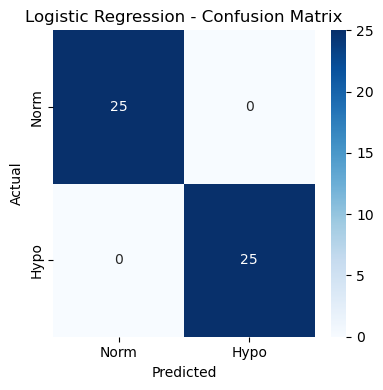

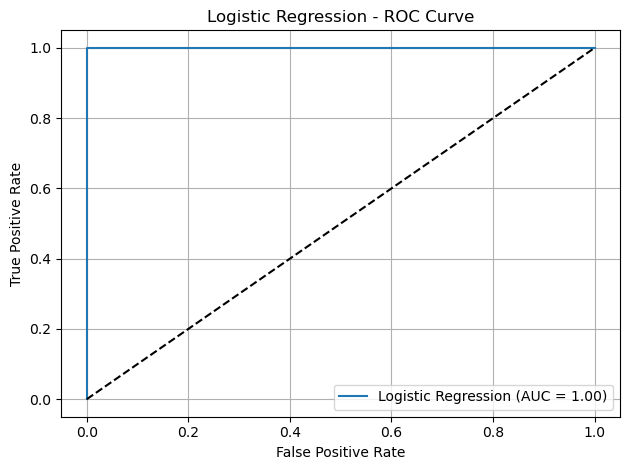

In [142]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear")

param_grid_logreg = {
    "C": [0.001, 0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"]
}

metrics_logreg = train_and_evaluate(
    model=logreg,
    param_grid=param_grid_logreg,
    model_name="Logistic Regression",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

### Now split dataset

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_mcf, y_mcf,
    test_size=0.2,
    stratify=y_mcf,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (200, 3)
Test shape : (50, 3)


### Evaluation Metrics

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        "CV Accuracy": cross_val_score(model, X_train, y_train, cv=cv).mean()
    }

    return results

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(results_dict, title=None):
    cm = results_dict['confusion_matrix']
    name = results_dict.get('name', 'Model') if title is None else title

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

### RANDOM FOREST CLASSIFIER

In [116]:
X = X_mcf  # PCA or gene expression 
y = y_mcf  # From metadata

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

def run_random_forest(X_train, y_train, X_test, y_test, cv=5):
    results = {}
    results['name'] = 'Random Forest'

    # Step 1: Tune parameters
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid = GridSearchCV(
        RandomForestClassifier(n_estimators=100, random_state=42),
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_params = grid.best_params_
    results['parameters'] = best_params

    # Step 2: Train final model
    final_model = RandomForestClassifier(n_estimators=100, random_state=42, **best_params)
    final_model.fit(X_train, y_train)
    results['model'] = final_model

    # Step 3: Evaluate
    y_pred = final_model.predict(X_test)
    y_prob = final_model.predict_proba(X_test)[:, 1]

    results['predictions'] = y_pred
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1'] = f1_score(y_test, y_pred)
    results['auc'] = roc_auc_score(y_test, y_prob)
    results['confusion_matrix'] = confusion_matrix(y_test, y_pred)
    results['cv_accuracy'] = cross_val_score(final_model, X_train, y_train, cv=cv).mean()

    # Step 4: Plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Random Forest')
    plt.tight_layout()
    plt.show()

    return results

In [131]:
rf_results = run_random_forest(X_train, y_train, X_test, y_test)

# Print results
for metric, value in rf_results.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.4f}")

accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
auc: 1.0000
cv_accuracy: 0.9900


In [132]:
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='CV')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

#### Hyperparameter Tuning (Grid Search)

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


#### Evaluation

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = best_rf.predict(X_test)

metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_pred)
}

for k, v in metrics_rf.items():
    print(f"{k}: {v:.4f}")

Accuracy: 0.9600
Precision: 1.0000
Recall: 0.9200
F1 Score: 0.9583
ROC AUC: 0.9600


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

def run_random_forest(X_train, y_train, X_test, y_test, cv=5, n_iter=50):
    results = {}
    results['name'] = 'Random Forest'

    # Define hyperparameter search space
    param_dist = {
        'n_estimators': np.arange(10, 201, 10),
        'max_depth': [None] + list(np.arange(2, 20, 2)),
        'min_samples_split': np.arange(2, 11),
        'min_samples_leaf': np.arange(1, 11),
        'bootstrap': [True, False]
    }

    # Base model
    base_model = RandomForestClassifier(random_state=42)

    # Randomized search
    random_search = RandomizedSearchCV(
        base_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    results['parameters'] = best_params

    # Final model with best parameters
    final_model = RandomForestClassifier(**best_params, random_state=42)
    final_model.fit(X_train, y_train)
    results['model'] = final_model

    # Predictions and probabilities
    y_pred = final_model.predict(X_test)
    y_prob = final_model.predict_proba(X_test)[:, 1]

    results['predictions'] = y_pred
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1'] = f1_score(y_test, y_pred)
    results['auc'] = roc_auc_score(y_test, y_prob)
    results['confusion_matrix'] = confusion_matrix(y_test, y_pred)

    # Cross-validation accuracy (training set)
    results['cv_accuracy'] = cross_val_score(final_model, X_train, y_train, cv=cv).mean()

    return results

Test Accuracy: 1.000
Confusion Matrix:


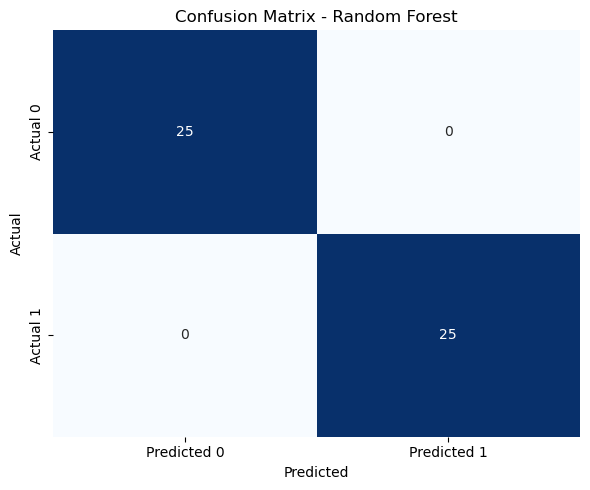

In [130]:
rf_results = run_random_forest(X_train, y_train, X_test, y_test)
print(f"Test Accuracy: {rf_results['accuracy']:.3f}")
print("Confusion Matrix:")
plot_confusion_matrix(rf_results)

### **HCC1806 Cell line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [54]:
dfs_hcc_unfiltered.isnull().values.any()

False

#### - *Check Data Types*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [55]:
dfs_hcc_unfiltered.dtypes

output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       int64
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        int64
                                                                        ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     int64
Length: 243, dtype: object

In [56]:
(dfs_hcc_unfiltered.dtypes=="int64").all()

True

This ensures that all the entries are integers.

#### - *Check Low Count Rows and Columns*

In [57]:
gene_symbols_hcc = dfs_hcc_unfiltered.index.tolist()
print("Dataframe indexes:", gene_symbols_hcc)

Dataframe indexes: ['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F29', 'MTND1P23', 'MTND2P28', 'MTCO1P12', 'MTCO2P12', 'MTATP8P1', 'MTATP6P1', 'MTCO3P12', 'OR4F16', 'CICP3', 'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'TUBB8P11', 'LINC02593', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN', 'RNF223', 'C1orf159', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'B3GALT6', 'C1QTNF12', 'UBE2J2', 'LINC01786', 'SCNN1D', 'ACAP3', 'MIR6726', 'PUSL1', 'INTS11', 'MIR6727', 'CPTP', 'TAS1R3', 'DVL1', 'MIR6808', 'MXRA8', 'AURKAIP1', 'NDUFB4P8', 'CCNL2', 'MRPL20-AS1', 'MRPL20', 'RN7SL657P', 'MRPL20-DT', 'ANKRD65', 'LINC01770', 'VWA1', 'ATAD3C', 'ATAD3B', 'ATAD3A', 'SSU72', 'FNDC10', 'MIB2', 'CDK11B', 'SLC35E2B', 'MMP23A', 'CDK11A', 'SLC35E2A', 'NADK', 'GNB1', 'TMEM52', 'CFAP74', 'GABRD', 'PRKCZ', 'PRKCZ-AS1', 'FAAP20', 'SKI', 'MORN1', 'RER1', 'PEX10', 'PLCH2', 'PANK4', 'HES5', 'TNFRSF14-AS1', 'TNFRSF14', 'PRXL2B', 'MMEL1', 'PRDM16', 'ARHGEF16', 'MEGF6', 'TPRG1L', 'WRAP73', 'T

#### **2.2.1** Per Cell

We begin by computing **descriptive statistics for each cell** in the unfiltered HCC1806 dataset. This mirrors the same quality control step we performed for MCF7.

For each cell (i.e., each column in the expression matrix), we calculate:
- **Mean** and **Median** expression values,
- **Standard deviation** (Std) to assess variability,
- **Minimum** and **Maximum** values to detect extreme expression,
- **First (Q1)** and **third (Q3) quartiles**,
- **Interquartile range (IQR)**, which measures the spread of the middle 50% of expression values.

These statistics help identify potential outliers, unusually low-expression cells, or other technical artifacts. The structure is stored in a DataFrame (`cell_stats_hcc`) and previewed with `.head()` to verify correctness.


In [58]:
cell_stats_hcc = pd.DataFrame({
    'Mean': dfs_hcc_unfiltered.mean(),
    'Median': dfs_hcc_unfiltered.median(),
    'Std': dfs_hcc_unfiltered.std(),
    'Min': dfs_hcc_unfiltered.min(),
    'Max': dfs_hcc_unfiltered.max(),
    'Q1': dfs_hcc_unfiltered.quantile(0.25),
    'Q3': dfs_hcc_unfiltered.quantile(0.75),
    'IQR': dfs_hcc_unfiltered.quantile(0.75) - dfs_hcc_unfiltered.quantile(0.25),
})

print("Per-cell statistics:")
cell_stats_hcc.head()

Per-cell statistics:


Mean  Median  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....   99.565695     0.0   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  207.678278     0.0   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...    9.694734     0.0   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  150.689007     0.0   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...   35.700504     0.0   

                                                           Std  Min    Max  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  529.532443    0  35477   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  981.107905    0  69068   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...   65.546050    0   6351   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  976.936548    0  70206   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  205.885369    0  17326   

                                                     Q1     Q3    IQR  
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....  0.0   51.0   51.0  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...  0.0  125.0  125.0  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...  0.0    5.0    5.0  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...  0.0   40.0   40.0  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...  0.0   22.0   22.0

### 🎲 Sampling and Log-Transforming a Subset of SmartSeq HCC1806 Cells

In this step, we randomly select a **subset of 10 cells** from the unfiltered SmartSeq dataset for the **HCC1806** cell line (`dfs_hcc_unfiltered`), using a fixed random seed to ensure reproducibility.

This subset serves as a lightweight sample for **visual inspection of gene expression distributions**. By working with just a few cells, we can explore overall expression patterns, detect anomalies, and preview the variability across genes before applying any filtering or dimensionality reduction.


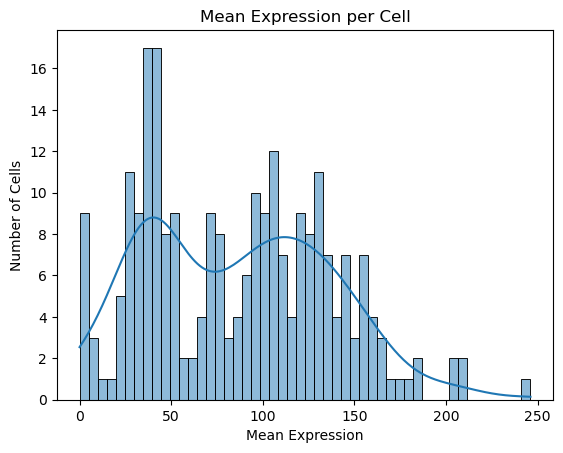

In [59]:
sns.histplot(cell_stats_hcc["Mean"], bins=50, kde=True)
plt.title("Mean Expression per Cell")
plt.xlabel("Mean Expression")
plt.ylabel("Number of Cells")
plt.show()

In this cell, we check whether there are any **duplicate gene expression rows** in the filtered SmartSeq dataset for the **HCC1806** cell line (`dfs_hcc_f1`).

Using `duplicated().any()`, we ask:
> "Are there any genes with identical expression values across all HCC1806 cells?"

If the result is `True`, it suggests possible redundancy or artifacts introduced during preprocessing. Removing such duplicates helps preserve the integrity of the dataset and prevents certain genes from artificially dominating downstream analyses.

After the check, we apply a **log transformation** using `log(1 + x)` to stabilize the variance and reduce the influence of highly expressed genes — a standard step in single-cell RNA-seq preprocessing.

Lastly, we **reshape the transformed data into long format**, which is required for creating violin or box plots in


/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_2243/879285768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfs_hcc_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")


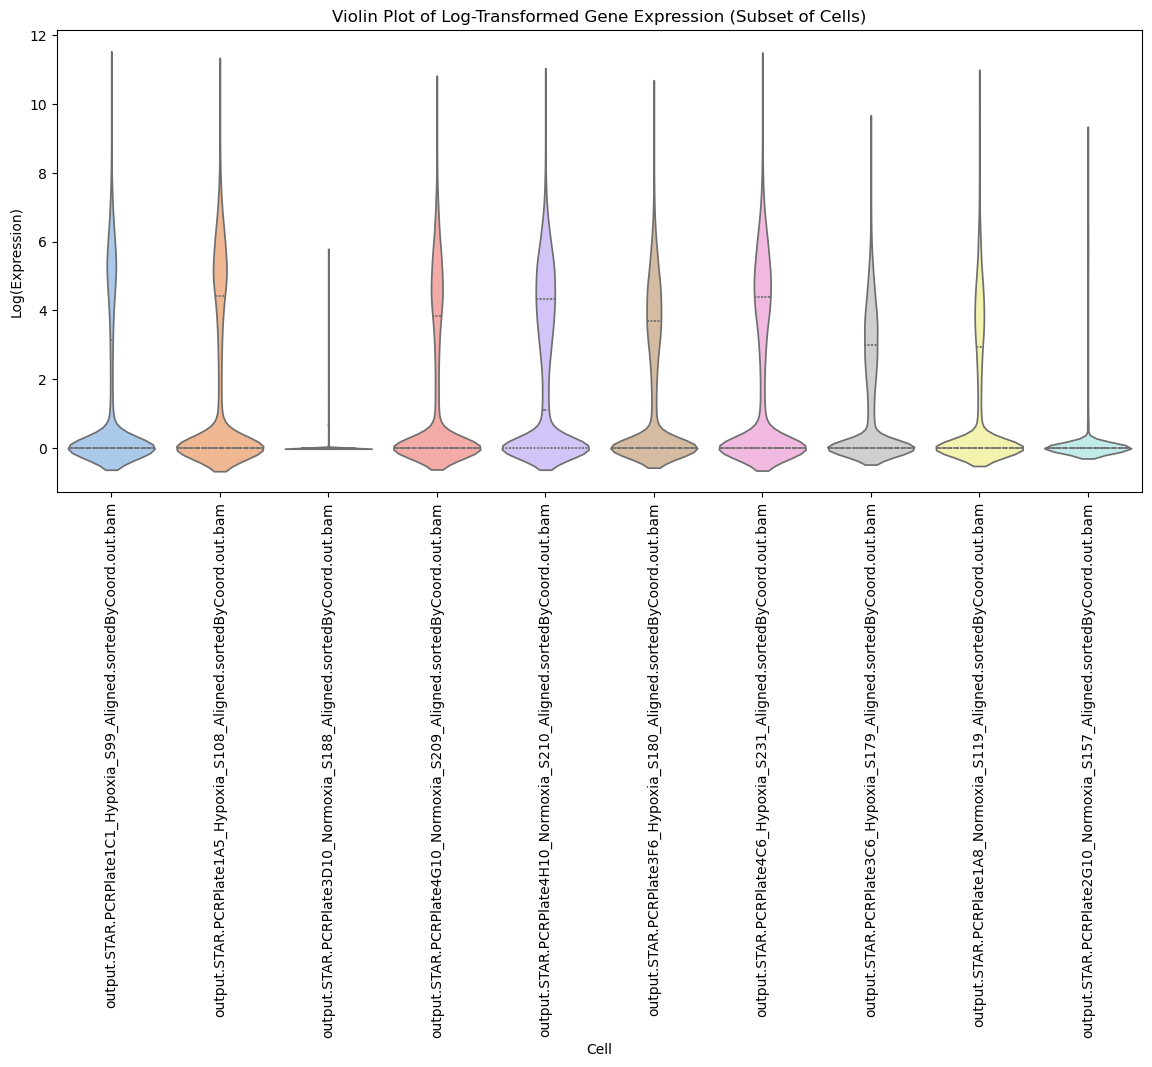

In [60]:
np.random.seed(42)
subset_cells_hcc = np.random.choice(dfs_hcc_unfiltered.columns, size=10, replace=False)
dfs_hcc_subset = dfs_hcc_unfiltered[subset_cells_hcc]

# Log-transform: log(1 + x)
dfs_hcc_log = np.log1p(dfs_hcc_subset)

# Conversione in formato long per Seaborn
dfs_hcc_melted = dfs_hcc_log.melt(var_name="Cell", value_name="Log(Expression)")

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=dfs_hcc_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")
plt.xticks(rotation=90)
plt.title("Violin Plot of Log-Transformed Gene Expression (Subset of Cells)")
plt.show()

We now compute the **correlation matrix** for the selected subset of HCC1806 cells. This matrix contains the **pairwise Pearson correlation coefficients** between the gene expression profiles of each pair of cells.

Correlation values close to 1 indicate that two cells have **very similar expression patterns**, while values near 0 (or negative) suggest that the cells are **dissimilar or even oppositely expressed**.

By visualizing this matrix as a **heatmap**, we can get a quick overview of how transcriptionally similar the sampled HCC1806 cells are. This helps us detect:
- **Groups of similar cells** that might represent shared states or subtypes,
- **Outlier cells** with atypical profiles,
- **Technical variation** or batch effects.

This step provides an early unsupervised glimpse into the structure of the dataset.


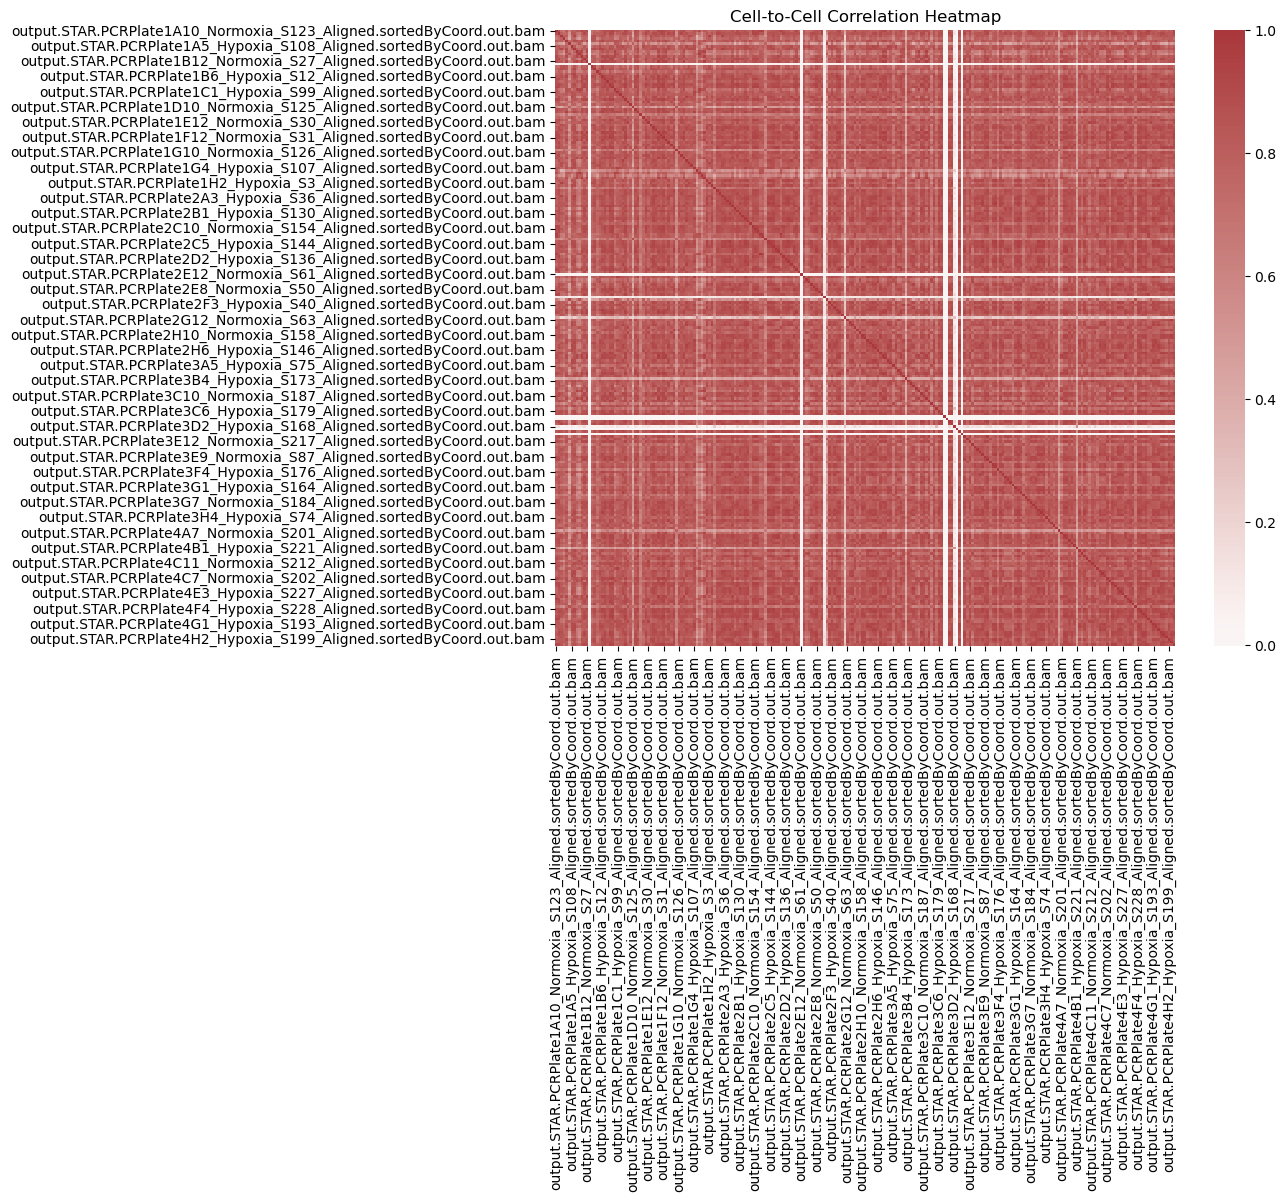

In [61]:
cell_corr_hcc = dfs_hcc_unfiltered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cell_corr_hcc, cmap="vlag", center=0)
plt.title("Cell-to-Cell Correlation Heatmap")
plt.show()

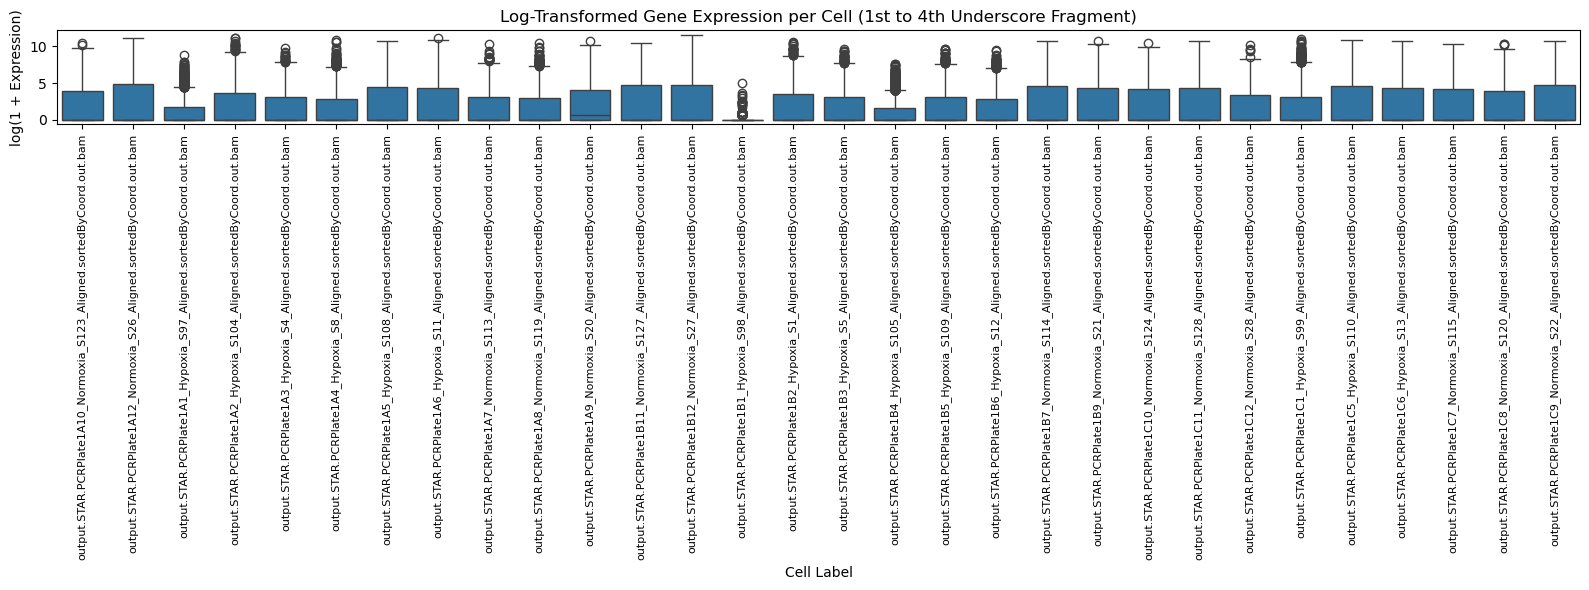

In [62]:
# Select 30 cells
sampled_cells = dfs_hcc_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:3])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_hcc_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the log-transformed gene expression values (log(1 + Expression)) across individual cells, grouped by cell label (extracted from the first to fourth underscore fragments). Although the median expression levels remain consistently low across groups, the distribution tails—represented by upper outliers—capture biologically relevant variability. These high-expression values likely reflect meaningful transcriptional activity in specific cell subpopulations. Removing such outliers would obscure this variability and potentially eliminate informative patterns critical for downstream analysis. Therefore, retaining them is essential to preserve the full complexity of the dataset.

#### **2.2.2** Per Gene

Next, we examine the **data types** in the HCC1806 expression matrix to ensure everything is in the correct format for downstream processing. We confirm that:
- **Gene expression values** are numerical (typically float),
- **Gene identifiers** are strings, formatted appropriately as row labels.

We then shift focus from individual cells to the **per-gene perspective**, asking:  
> "For each gene, how many HCC1806 cells show zero expression?"

We compute the number of **zero-expression values per gene**, which indicates how sparsely each gene is expressed across the dataset. Genes that are zero in most cells may reflect:
- **Technical dropout**, especially for low-abundance transcripts,
- **Biologically irrelevant genes** for this cell line,
- Or just **background noise**.

We visualize the result using a histogram that shows how many genes fall into each range of sparsity. This helps us distinguish:
- **Highly sparse genes**, which may be candidates for filtering out,
- **Broadly expressed genes**, which are more likely to be informative for clustering or classification.

This analysis informs the design of any **gene-level filtering** step applied later in the pipeline.


In [63]:
# Calculate per-gene statistics (assuming rows = genes, columns = cells)
gene_stats_hcc = pd.DataFrame(index=dfs_hcc_unfiltered.index)
gene_stats_hcc['Mean'] = dfs_hcc_unfiltered.mean(axis=1)
gene_stats_hcc['Std'] = dfs_hcc_unfiltered.std(axis=1)
gene_stats_hcc['% Expressing'] = (dfs_hcc_unfiltered > 0).mean(axis=1) * 100

# Display the results
print("Per-gene statistic:")
gene_stats_hcc.head()

Per-gene statistic:


Mean       Std  % Expressing
WASH7P    0.045267  0.318195      2.469136
CICP27    0.119342  0.594531      5.349794
DDX11L17  0.469136  1.455282     17.695473
WASH9P    0.255144  0.818639     13.991770
OR4F29    0.127572  0.440910      9.876543

To better understand the global activity levels of genes in the SmartSeq HCC1806 dataset, we compute the **log-transformed mean expression** for each gene.

We use the `log1p()` transformation (`log(x + 1)`) on the mean expression values to:
- Compress the dynamic range of gene expression,
- Reduce the influence of outliers and highly expressed genes,
- Produce a more interpretable and symmetric distribution for visualization.

We then plot a histogram of the resulting log-mean values, where:
- The x-axis represents the log-transformed mean expression level,
- The y-axis shows the number of genes that fall within each expression range.

This visualization helps distinguish:
- **Lowly expressed genes**, often dominated by noise or dropouts,
- **Highly expressed genes**, which are more likely to be functionally important or specific to the HCC1806 cell line.


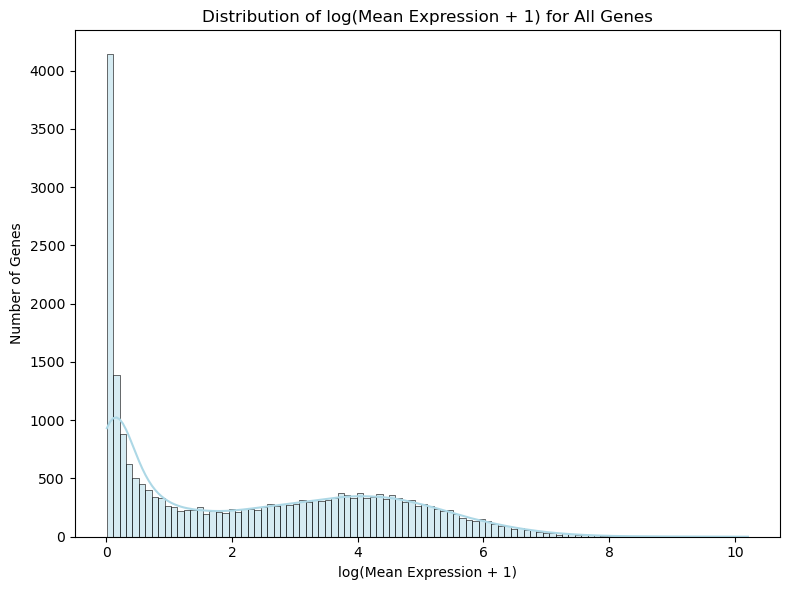

In [64]:
# Create a new column for log(Mean + 1)
gene_stats_hcc['logMean'] = np.log1p(gene_stats_hcc['Mean'])  # log1p(x) = log(x+1)

plt.figure(figsize=(8, 6))
sns.histplot(
    gene_stats_hcc['logMean'],
    bins=100,
    kde=True,
    color='lightblue'
)
plt.xlabel("log(Mean Expression + 1)")
plt.ylabel("Number of Genes")
plt.title("Distribution of log(Mean Expression + 1) for All Genes")
plt.tight_layout()
plt.show()

To explore which genes are most active across the HCC1806 cell population, we visualize the **top 10 genes ranked by average expression**.

For each gene, we display:
- A **bar** representing the mean expression level across all cells,
- An **error bar** showing the standard deviation (reflecting how much expression varies across cells),
- A **text label** indicating the **percentage of cells** in which the gene is expressed (non-zero expression).

This visualization highlights genes that are:
- **Strongly and consistently expressed**, possibly pointing to essential cellular functions (e.g., housekeeping genes),
- Or **highly variable**, which may signal involvement in dynamic processes like stress response, differentiation, or signaling pathways.

These top-expressed genes serve as useful entry points for biological interpretation or downstream validation.


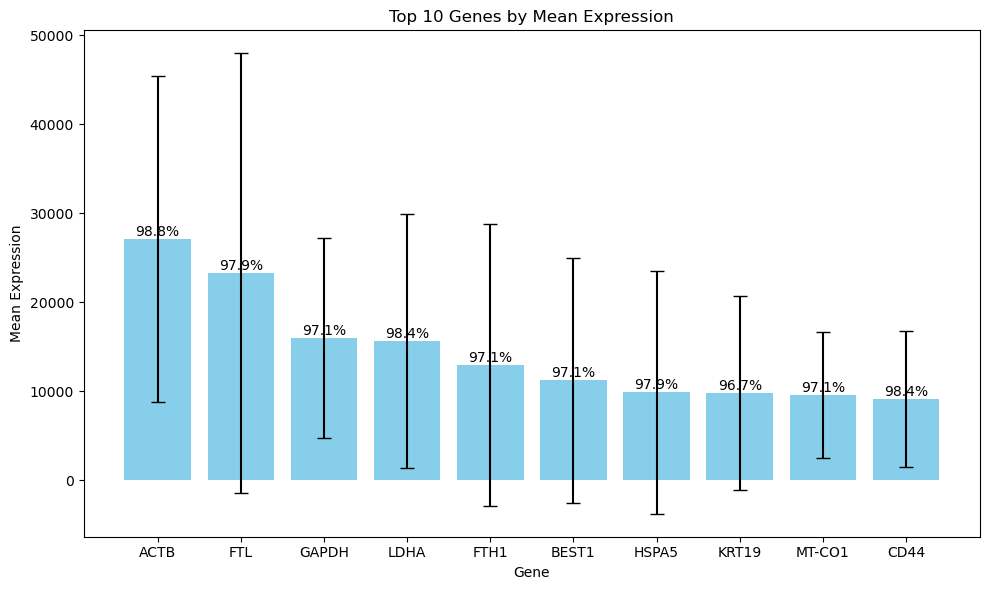

In [65]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

top10_genes_hcc = gene_stats_hcc.sort_values(by='Mean', ascending=False).head(10)

# Create a bar plot for the top 10 genes with error bars (SD)
bars = ax.bar(top10_genes_hcc.index, top10_genes_hcc['Mean'], yerr=top10_genes_hcc['Std'], capsize=5, color='skyblue')

ax.set_ylabel("Mean Expression")
ax.set_xlabel("Gene")
ax.set_title("Top 10 Genes by Mean Expression")

# Annotate each bar with the percentage of cells expressing the gene
for bar, pct in zip(bars, top10_genes_hcc["% Expressing"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

To better understand how expression varies across cells for the **top 10 most expressed genes** in the HCC1806 dataset, we extract their expression values from the original unfiltered SmartSeq matrix.

We then **reshape the data into long format**, as required by Seaborn’s `violinplot()` function. In this format, each row represents a single gene’s expression value in one cell.

The resulting violin plots display:
- The **distribution of expression levels** for each gene across the cell population,
- **Quartile markers** (25th, 50th, and 75th percentiles) inside each violin,
- The **density and shape** of the expression spread, helping to reveal whether expression is uniform or driven by a subset of cells.

This view complements the earlier bar plot by showing **within-gene variability**, allowing us to distinguish between uniformly and heterogeneously expressed genes.


/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_2243/4020002858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')


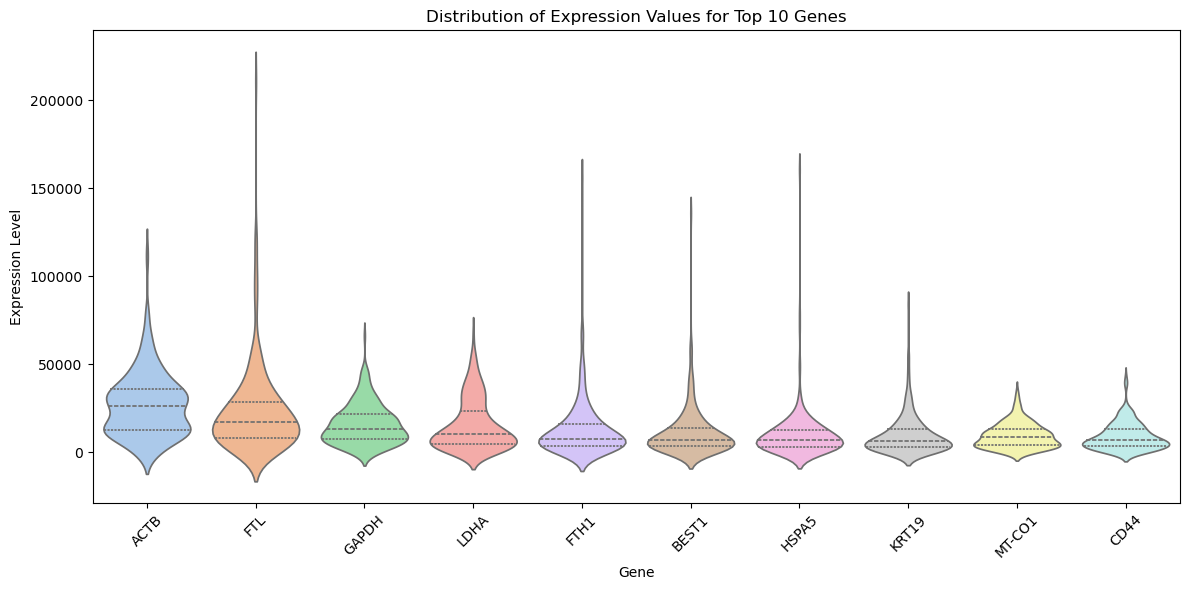

In [66]:
# Subset original data for only the top 10 genes
df_top10 = dfs_hcc_unfiltered.loc[top10_genes_hcc.index]

# Melt the DataFrame so that you have a long-form DataFrame for seaborn
df_melted = df_top10.reset_index().melt(id_vars='index', var_name='Cell', value_name='Expression')
df_melted.rename(columns={'index': 'Gene'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')
plt.title("Distribution of Expression Values for Top 10 Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

To visualize how overall gene expression varies across individual cells in the HCC1806 SmartSeq dataset, we select a **subset of 30 cells**.

Each cell identifier contains structured metadata separated by underscores. To simplify the plot and improve readability, we extract a **partial label** from each cell name — specifically, the substring between the **first and fourth underscores**. This label often encodes information like condition, batch, or experimental plate.

We then apply a **log1p transformation** (`log(1 + expression)`) to stabilize the variance and reduce the impact of highly expressed genes, making patterns across cells more interpretable.

The expression data is reshaped into **long format** and visualized using a **boxplot**, where:
- The box shows the **interquartile range (IQR)**,
- The central line represents the **median expression**,
- Whiskers and points capture the **overall spread** and potential outliers.

This plot helps reveal:
- Cells with **unusually low or high expression**,
- Possible **technical noise** or batch effects,
- Differences in overall transcriptional activity across the sampled population.


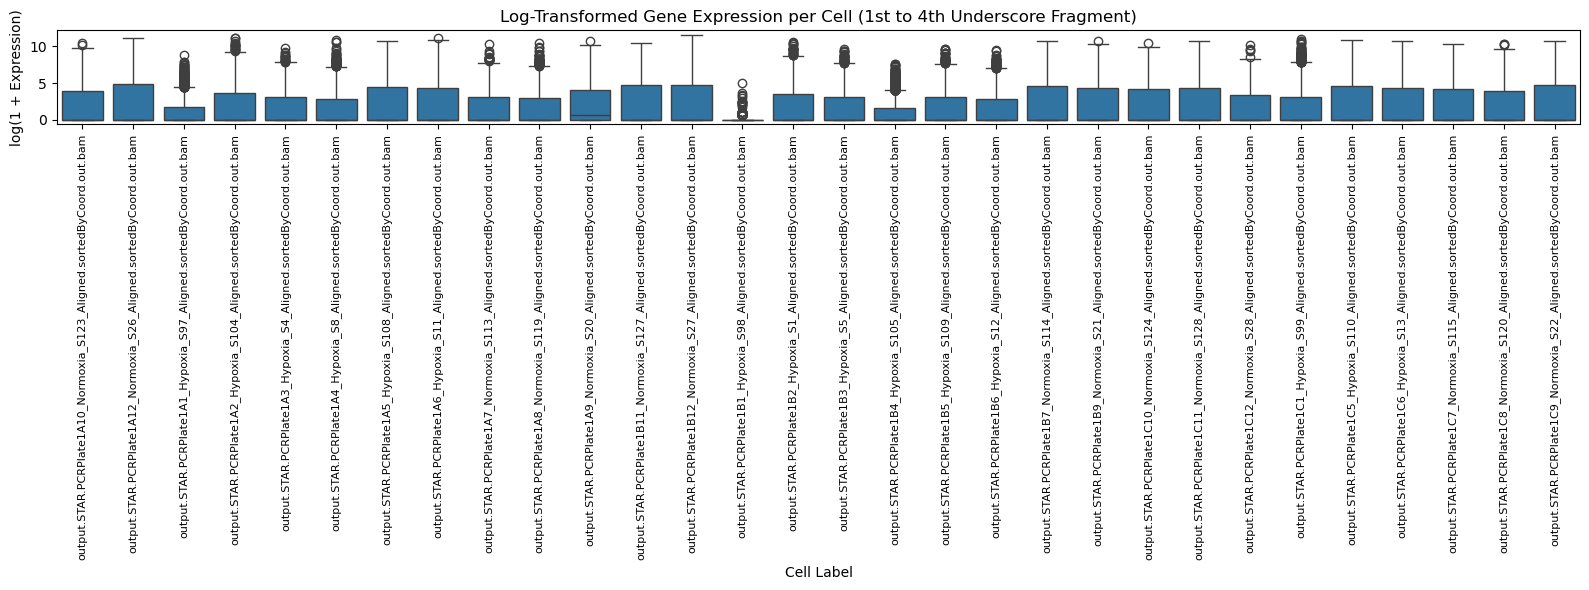

In [67]:
# Select 30 cells
sampled_cells = dfs_hcc_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:4])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_hcc_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the **log-transformed gene expression values** (`log(1 + Expression)`) across a selection of HCC1806 cells, grouped by cell label (extracted from the first to fourth underscore fragments of each cell name).

While the **median expression** appears consistently low across most cells — a typical feature of sparse single-cell data — the **upper tails** of the distributions (outliers) reveal important biological variability.

These high-expression outliers likely correspond to **genes that are highly active in specific subpopulations of cells**, potentially reflecting functional states, responses to hypoxia, or lineage-specific programs.

Importantly, we choose to **retain these outliers**, as filtering them out would risk erasing valuable biological signals. Preserving the full range of expression variation is crucial for uncovering meaningful patterns in downstream analyses such as clustering, PCA, or differential expression testing.


### **2.3** Sparsity
In single-cell RNA-seq data, sparsity refers to the high proportion of zero values in the gene expression matrix. This sparsity arises due to both biological reasons (e.g., genes not expressed in certain cells) and technical limitations (e.g., dropout events during sequencing).

It is crucial to quantify and understand sparsity before performing any filtering or transformation, especially in datasets like HCC1806, which may include highly specific expression patterns. Naive approaches (like automatic outlier removal) could discard informative, rare gene signals. For instance, a gene expressed in only a few HCC1806 cells might represent a marker of hypoxia response or subtype-specific behavior.

#### **2.3.1** Global Sparsity
We first compute the global sparsity of the HCC1806 unfiltered dataset — the fraction of all gene-cell entries that are zero. This gives a general sense of how sparse the dataset is overall.

A moderate sparsity level (e.g., 60–80%) is typical for SmartSeq data, suggesting a balance between biological signal and dropout.



In [68]:
n_genes, n_cells = dfs_hcc_unfiltered.shape
total_entries = n_genes * n_cells
total_zeros = (dfs_hcc_unfiltered == 0).sum().sum()
global_sparsity = total_zeros / total_entries
print(f"\n Global sparsity: {global_sparsity:.2%} ({total_zeros:,} / {total_entries:,} zero values)")


 Global sparsity: 55.85% (3,174,951 / 5,685,228 zero values)


#### **2.3.2** Per Cell


In [69]:
# Sparsity per cell (columns): how many zeros per cell
cell_sparsity = (dfs_hcc_unfiltered == 0).sum(axis=0) / n_genes
print(f"\n Cell sparsity — mean: {cell_sparsity.mean():.2%}, std: {cell_sparsity.std():.2%}")
print(f"   Min: {cell_sparsity.min():.2%}, Max: {cell_sparsity.max():.2%}")


 Cell sparsity — mean: 55.85%, std: 9.66%
   Min: 40.22%, Max: 99.85%


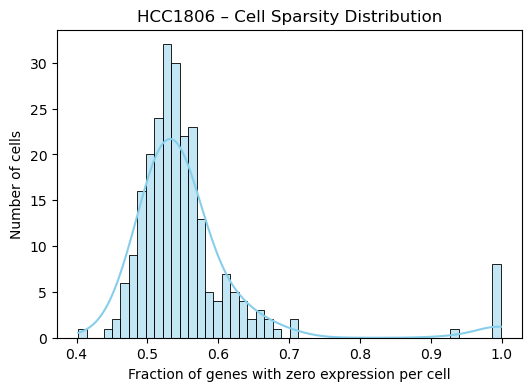

In [70]:
plt.figure(figsize=(6, 4))
sns.histplot(cell_sparsity, bins=50, kde=True, color="skyblue")
plt.title("HCC1806 – Cell Sparsity Distribution")
plt.xlabel("Fraction of genes with zero expression per cell")
plt.ylabel("Number of cells")
plt.show()

#### **2.3.3** Per Gene


In [71]:
gene_sparsity = (dfs_hcc_unfiltered == 0).sum(axis=1) / n_cells
print(f"\n🔹 Gene sparsity — mean: {gene_sparsity.mean():.2%}, std: {gene_sparsity.std():.2%}")
print(f"   Min: {gene_sparsity.min():.2%}, Max: {gene_sparsity.max():.2%}")


🔹 Gene sparsity — mean: 55.85%, std: 37.30%
   Min: 1.23%, Max: 99.18%


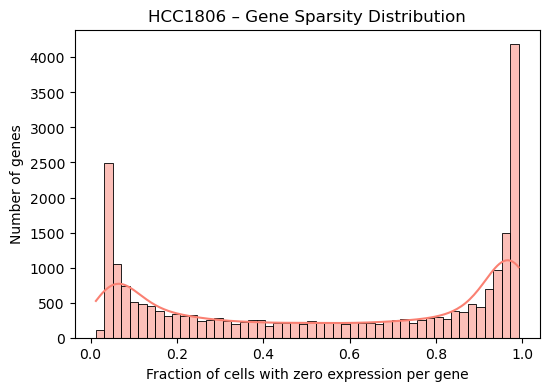

In [72]:
# Histogram: Gene sparsity
plt.figure(figsize=(6, 4))
sns.histplot(gene_sparsity, bins=50, kde=True, color="salmon")
plt.title("HCC1806 – Gene Sparsity Distribution")
plt.xlabel("Fraction of cells with zero expression per gene")
plt.ylabel("Number of genes")
plt.show()

#### 🧠 Interpretation of Sparsity
The HCC1806 dataset exhibits typical sparsity for single-cell SmartSeq data. Most cells express a reasonable fraction of genes, though some may appear nearly empty. Similarly, many genes are either expressed in nearly all cells or very few.

We conclude that:

Sparsity is expected and manageable,

Blind outlier removal is inappropriate, since it could discard real biology,

Instead, we will apply coverage-aware thresholds in the next step to filter out problematic genes and cells.

### **2.4** Outlier Analysis
In traditional data analysis, outliers are often removed to reduce noise. However, in single-cell RNA-seq, outliers often reflect real biology.

Examples include:

A cell with extreme expression of stress-response genes (e.g., hypoxia),

A gene expressed in only a few cells that acts as a lineage or subtype marker.

In this step, we assess potential outliers among HCC1806 cells using:

Total counts per cell (a proxy for sequencing depth),

Number of expressed genes per cell.

We use the IQR (interquartile range) method to define thresholds, flagging:

Cells with very low total expression (possibly low quality),

Cells with very high total expression (possible doublets),

Cells expressing unusually few genes.

In [73]:
# Total expression per cell (library size)
total_counts = dfs_hcc_unfiltered.sum(axis=0)
n_expressed_genes = (dfs_hcc_unfiltered > 0).sum(axis=0)

# Compute IQR-based thresholds
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Thresholds
libsize_low, libsize_high = get_iqr_bounds(total_counts)
nexpr_low, nexpr_high = get_iqr_bounds(n_expressed_genes)

print(f"Total counts IQR: lower={libsize_low:.2f}, upper={libsize_high:.2f}")
print(f"Expressed genes IQR: lower={nexpr_low:.0f}, upper={nexpr_high:.0f}")

# Flagging outlier cells
low_libsize_cells = total_counts[total_counts < libsize_low]
high_libsize_cells = total_counts[total_counts > libsize_high]
low_gene_cells = n_expressed_genes[n_expressed_genes < nexpr_low]

print(f"Cells with low total expression: {len(low_libsize_cells)}")
print(f"Cells with high total expression (possible doublets): {len(high_libsize_cells)}")
print(f"Cells with very few expressed genes: {len(low_gene_cells)}")

Total counts IQR: lower=-1910116.00, upper=5826360.00
Expressed genes IQR: lower=8179, upper=13347
Cells with low total expression: 0
Cells with high total expression (possible doublets): 0
Cells with very few expressed genes: 18


#### 🧠 Interpretation
The IQR method is a classical statistical tool, but in sparse, skewed scRNA-seq data like HCC1806, it can be too conservative or even misleading.

In this case:

The lower bound for total counts may be negative, which is nonsensical,

No cells are flagged as low-expression outliers, despite the presence of sparse cells,

A set of cells are flagged for having very few expressed genes, consistent with low-quality or dying cells.

Thus, while IQR-based detection is informative, we will rely on biologically-informed, data-aware thresholds in the next section to filter cells based on coverage and quality.

### **2.5** Filtering Strategy and Dataset Update
After characterizing sparsity and diagnosing outlier cells, we now define and apply a set of filtering rules to clean the dataset. These rules are based on biological and statistical reasoning, and are not arbitrary or heuristic-only.

#### Goals of filtering:
- Remove genes that are not informative (e.g., barely expressed across cells)
- Remove low-quality cells with too few expressed genes

We follow a two-part strategy:
1. **QC-based diagnostic thresholds** — exploratory histograms and metrics to understand data variability
2. **Final filtering logic** — using biologically and statistically motivated percentage-based thresholds

This strategy avoids overly aggressive or arbitrary cutoffs and maintains reproducibility, as emphasized in the project instructions.

#### *2.5.1* Exploratory QC Metrics

In [74]:
# Transpose so cells are rows
hcc_cell_df = dfs_hcc_unfiltered.T

# Compute QC metrics for each cell
cell_qc_hcc = pd.DataFrame({
    "total_counts": hcc_cell_df.sum(axis=1),
    "n_genes_by_counts": (hcc_cell_df > 0).sum(axis=1),
    "pct_zero_genes": (hcc_cell_df == 0).sum(axis=1) / dfs_hcc_unfiltered.shape[0] * 100
})

cell_qc_hcc.head()

total_counts  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....       2329439   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...       4858841   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...        226818   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...       3525520   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...        835249   

                                                    n_genes_by_counts  \
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....              10796   
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...              11251   
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...               9887   
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...               7597   
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...              10136   

                                                    pct_zero_genes  
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned....       53.855360  
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.s...       51.910583  
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sor...       57.740639  
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.so...       67.528637  
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sort...       56.676355

In [75]:
cell_qc_hcc.describe()

total_counts  n_genes_by_counts  pct_zero_genes
count  2.430000e+02         243.000000      243.000000
mean   2.012306e+06       10330.358025       55.845623
std    1.171858e+06        2260.259356        9.660879
min    1.140000e+02          35.000000       40.220551
25%    9.910625e+05       10117.000000       51.235254
50%    2.067645e+06       10831.000000       53.705762
75%    2.925182e+06       11409.000000       56.757565
max    5.758132e+06       13986.000000       99.850402

#### - Filtering the data based on total count and % expressed

In [76]:
filtered_cells = cell_qc_hcc[
    (cell_qc_hcc["total_counts"] >= 200000) &
    (cell_qc_hcc["n_genes_by_counts"] >= 8000) &
    (cell_qc_hcc["pct_zero_genes"] <= 70)
]
cells_to_keep = filtered_cells.index
dfs_hcc_f1 = dfs_hcc_unfiltered[cells_to_keep]
print("Filtered DataFrame shape:", dfs_hcc_f1.shape)

Filtered DataFrame shape: (23396, 227)


In [77]:
gene_qc_hcc = pd.DataFrame({
    "total_expression": dfs_hcc_f1.sum(axis=1),
    "n_cells_expressed": (dfs_hcc_f1 > 0).sum(axis=1),
    "pct_cells_expressed": (dfs_hcc_f1 > 0).sum(axis=1) / dfs_hcc_f1.shape[1] * 100
})

gene_qc_hcc.describe()

total_expression  n_cells_expressed  pct_cells_expressed
count      2.339600e+04       23396.000000         23396.000000
mean       2.037074e+04         104.960335            46.238033
std        9.928471e+04          88.481827            38.978778
min        0.000000e+00           0.000000             0.000000
25%        6.500000e+01          12.000000             5.286344
50%        1.709500e+03          91.000000            40.088106
75%        1.426125e+04         202.000000            88.986784
max        6.350661e+06         227.000000           100.000000

In [78]:
filtered_genes = gene_qc_hcc[
    (gene_qc_hcc["pct_cells_expressed"] >= 2) &
    (gene_qc_hcc["total_expression"] >= 11)
]

genes_to_keep = filtered_genes.index
dfs_hcc_f2 = dfs_hcc_f1.loc[genes_to_keep]
print("Filtered DataFrame shape:", dfs_hcc_f2.shape)
print("Given Filtered DataFrame shape:", dfs_hcc_filtered.shape)

Filtered DataFrame shape: (19539, 227)
Given Filtered DataFrame shape: (19503, 227)


#### - Checking for duplicates

In [79]:
duplicate_rows_hcc = dfs_hcc_f2.duplicated(keep=False)
dfs_hcc_f2[duplicate_rows_hcc]

output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam  \
PCDHA2                                                           0                      
PCDHA4                                                           0                      
PCDHA8                                                           0                      
PCDHGA2                                                          0                      
PCDHGA3                                                          0                      
PCDHGB3                                                          0                      
PCDHGA7                                                          0                      
PCDHGA9                                                          0                      
PCDHGB7                                                          0                      
PCDHGA12                                                         0                      
PCDHGC4                                                          0                      
PANDAR                                                           1                      
LAP3P2                                                           1                      
MIR374B                                                          0                      
MIR374C                                                          0                      
MIR548AA1                                                        0                      
MIR548D1                                                         0                      
MIR3074                                                          0                      
MIR24-1                                                          0                      
SUGT1P4-STRA6LP                                                  0                      
STRA6LP                                                          0                      

                 output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam  \
PCDHA2                                                           0                     
PCDHA4                                                           0                     
PCDHA8                                                           0                     
PCDHGA2                                                        106                     
PCDHGA3                                                        106                     
PCDHGB3                                                        106                     
PCDHGA7                                                        106                     
PCDHGA9                                                        106                     
PCDHGB7                                                        106                     
PCDHGA12                                                       106                     
PCDHGC4                                                        106                     
PANDAR                                                           1                     
LAP3P2                                                           1                     
MIR374B                                                          0                     
MIR374C                                                          0                     
MIR548AA1                                                        0                     
MIR548D1                                                         0                     
MIR3074                                                          0                     
MIR24-1                                                          0                     
SUGT1P4-STRA6LP                                                  0                     
STRA6LP                                                          0                     

                 output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam  \
PCDHA2                             

In [80]:
duplicates_grouped_hcc = dfs_hcc_f2.groupby(list(dfs_hcc_f2.columns)).filter(lambda x: len(x) > 1)
# Raggruppa nuovamente per profilo e costruisci le tuple con i nomi dei geni
duplicate_gene_hcc_tuples = [
    tuple(group.index)
    for _, group in duplicates_grouped_hcc.groupby(list(duplicates_grouped_hcc.columns))
]

# Stampa la lista di tuple
print("Duplicate gene tuples:", duplicate_gene_hcc_tuples)

Duplicate gene tuples: [('MIR3074', 'MIR24-1'), ('MIR374B', 'MIR374C'), ('SUGT1P4-STRA6LP', 'STRA6LP'), ('MIR548AA1', 'MIR548D1'), ('PCDHA2', 'PCDHA4', 'PCDHA8'), ('PCDHGA2', 'PCDHGA3', 'PCDHGB3', 'PCDHGA7', 'PCDHGA9', 'PCDHGB7', 'PCDHGA12', 'PCDHGC4'), ('PANDAR', 'LAP3P2')]


# ‼️ ADD WHETHER REMOVE DUPLICATES

### **2.4** Normalization log 

In [81]:
# Log1p Transform
dfs_hcc_log = np.log1p(dfs_hcc_f2)

# Print log-transformed data (before Z-score)
print("HCC1806: After Log1p, Before Z-score")
print(dfs_hcc_log.iloc[:10, :10])

# Z-score normalization
dfs_hcc_normalized = pd.DataFrame(
    StandardScaler().fit_transform(dfs_hcc_log.T).T,
    index=dfs_hcc_log.index,
    columns=dfs_hcc_log.columns)

# Print Z-score normalized data
print("HCC1806: After Z-score")
print(dfs_hcc_normalized.iloc[:10, :10])




HCC1806: After Log1p, Before Z-score
          output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam  \
WASH7P                                             0.000000                      
CICP27                                             0.000000                      
DDX11L17                                           0.000000                      
WASH9P                                             0.000000                      
OR4F29                                             1.098612                      
MTND1P23                                           5.525453                      
MTND2P28                                           4.007333                      
MTCO1P12                                           7.462215                      
MTCO2P12                                           1.945910                      
MTATP8P1                                           0.693147                      

          output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sort

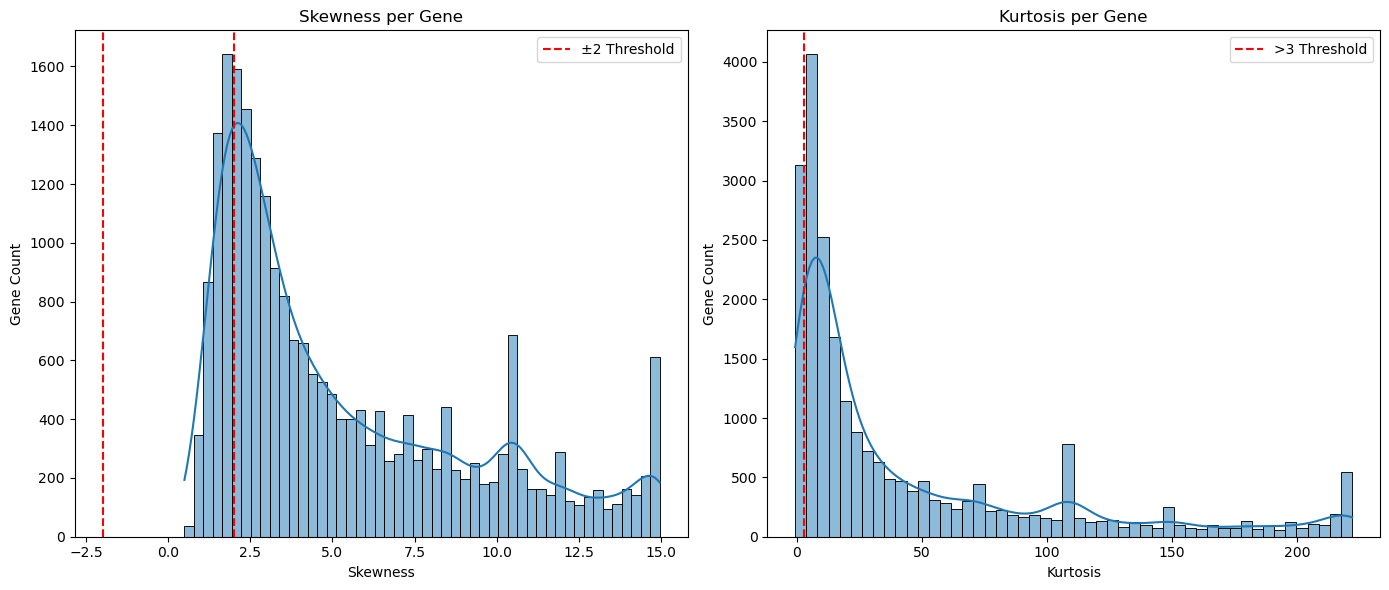

Genes with high skewness (|skew| > 2):
          Skewness   Kurtosis
WASH7P    7.645988  60.989386
CICP27    6.180702  41.577900
DDX11L17  4.015227  18.179532
WASH9P    4.314789  21.510070
OR4F29    4.703500  28.408386
...            ...        ...
MT-TR     2.690587   9.210228
MT-TS2    2.258065   6.403031
MT-TE     5.552083  50.917196
MT-TT     2.507296  10.010172
MT-TP     2.203729   8.170438

[18754 rows x 2 columns]

Genes with high kurtosis (> 3):
          Skewness   Kurtosis
WASH7P    7.645988  60.989386
CICP27    6.180702  41.577900
DDX11L17  4.015227  18.179532
WASH9P    4.314789  21.510070
OR4F29    4.703500  28.408386
...            ...        ...
MT-TS2    2.258065   6.403031
MT-TE     5.552083  50.917196
MT-CYB    1.592522   3.766994
MT-TT     2.507296  10.010172
MT-TP     2.203729   8.170438

[21041 rows x 2 columns]


In [82]:
skewness = dfs_hcc_f1.apply(skew, axis=1)
kurt = dfs_hcc_f1.apply(kurtosis, axis=1)

# Create summary DataFrame
distribution_summary = pd.DataFrame({
    "Skewness": skewness,
    "Kurtosis": kurt
})

# Identify genes with high skewness or kurtosis
high_skew = distribution_summary[abs(distribution_summary["Skewness"]) > 2]
high_kurt = distribution_summary[distribution_summary["Kurtosis"] > 3]

# Plotting
plt.figure(figsize=(14, 6))

# Skewness plot
plt.subplot(1, 2, 1)
sns.histplot(distribution_summary["Skewness"], bins=50, kde=True)
plt.axvline(2, color='red', linestyle='--', label='±2 Threshold')
plt.axvline(-2, color='red', linestyle='--')
plt.title("Skewness per Gene")
plt.xlabel("Skewness")
plt.ylabel("Gene Count")
plt.legend()

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.histplot(distribution_summary["Kurtosis"], bins=50, kde=True)
plt.axvline(3, color='red', linestyle='--', label='>3 Threshold')
plt.title("Kurtosis per Gene")
plt.xlabel("Kurtosis")
plt.ylabel("Gene Count")
plt.legend()

plt.tight_layout()
plt.show()

# Print flagged genes
print("Genes with high skewness (|skew| > 2):")
print(high_skew)

print("\nGenes with high kurtosis (> 3):")
print(high_kurt)

The left panel shows the distribution of skewness across genes. The vast majority of genes display positive skewness, with a sharp peak around values slightly above 2, and a long tail stretching beyond 15. This pattern indicates that gene expression distributions are asymmetric, with many low expression values and few extreme high values, a hallmark of sparse single-cell transcriptomic data. The red dashed lines at ±2 mark the threshold for high skewness, and it's clear that a large number of genes exceed this threshold, particularly on the positive side, suggesting widespread presence of rare expression bursts.

The right panel illustrates the kurtosis distribution per gene. Here, too, the bulk of genes exhibit kurtosis well above the threshold of 3, with values extending far beyond 200. This confirms that the variance in expression is strongly influenced by outliers, which may arise due to biological processes (like transcriptional bursts) or technical factors (such as dropout events). The steep initial peak near 0–10 is followed by a long right tail, consistent with heavy-tailed distributions.

Overall, these plots reveal a typical single-cell RNA-seq pattern: asymmetric and heavy-tailed gene expression distributions, driven by sparsity, noise, and biological variability. Such genes with extreme skewness or kurtosis should be carefully examined, especially when used in downstream modeling or clustering.

### PCA Implementation
Our plan:
1. **Data Centering**: Subtract the mean from the dataset.

2. **Covariance Matrix Calculation**: Compute the covariance matrix of the centered data.

3. **Eigen-decomposition**: Use np.linalg.eig (or SVD) to compute eigenvalues and eigenvectors.

4. **Sorting Components**: Order the eigenvectors by the magnitude of their eigenvalues.

5. **Projection**: Project the original data onto the principal components.

6. **Reconstruction**: Reconstruct the data from the selected components and compute the reconstruction error (e.g., mean squared error).


In [83]:
def pca(X, num_components, standardize=False):
    # Center the data
    # Notice the axis=0 argument to calculate mean along the columns!
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    X_std = None
    if standardize: # standardize each feature to have unit variance
        X_std = np.std(X_centered, axis=0)
        # Avoid division by zero
        X_std[X_std == 0] = 1.0
        X_centered = X_centered / X_std
    
    # Compute covariance matrix
    # Notice the rowvar=False argument to indicate that
    # the columns represent features, and the rows instances
    # we also need to be sure no complex numbers are generated
    cov_matrix = np.cov(X_centered, rowvar=False, dtype=np.float64)

    # Eigen-decomposition
    # WARNING: we use np.linalg.eigh, 
    # that is specific for Hermitian matrices 
    # (in this case, the covariance matrix is symmetric)
    # this function is more stable and efficient for this case
    # and we avoid complex numbers!
    # It is also much more efficient than np.linalg.eig,
    # it returns the eigenvalues in ascending order 
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    # argsort is not really necessary, 
    # because we are using eigh instead of eig, 
    # but it helps for the visualization
    sorted_idx = np.argsort(eigenvalues)[::-1]

    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx] #The first dimension are the eigenvector themself, the second dimension are the respective eigenvalues
    
    # Select 'num_components' principal components
    components = eigenvectors_sorted[:, :num_components]
    
    # Project the data
    X_projected = np.dot(X_centered, components)
    
    # Reconstruct the data from the projection
    X_reconstructed = np.dot(X_projected, components.T) 

    # Reverse standardization if needed
    if standardize:
        X_reconstructed = X_reconstructed * X_std

    # Add the mean back
    X_reconstructed += X_mean

    # Compute reconstruction error (mean squared error)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    
    return {
        "X_mean": X_mean,
        "X_std": X_std,
        "components": components,
        "X_projected": X_projected,
        "X_reconstructed": X_reconstructed,
        "reconstruction_error": reconstruction_error,
        "eigenvalues": eigenvalues_sorted
    } 

for i in range (1,100,10):
    pca_result = pca(dfs_hcc_f1.to_numpy(), num_components= i, standardize=True)
    print("PCA reconstruction error:", pca_result["reconstruction_error"])

PCA reconstruction error: 87201.05124420703
PCA reconstruction error: 22644.901592099068
PCA reconstruction error: 13757.871597363113
PCA reconstruction error: 10206.928866097365
PCA reconstruction error: 8109.667234428595
PCA reconstruction error: 6548.165716201406
PCA reconstruction error: 5453.011367969953
PCA reconstruction error: 4513.38164107409
PCA reconstruction error: 3856.013176376999
PCA reconstruction error: 3304.2602349104377


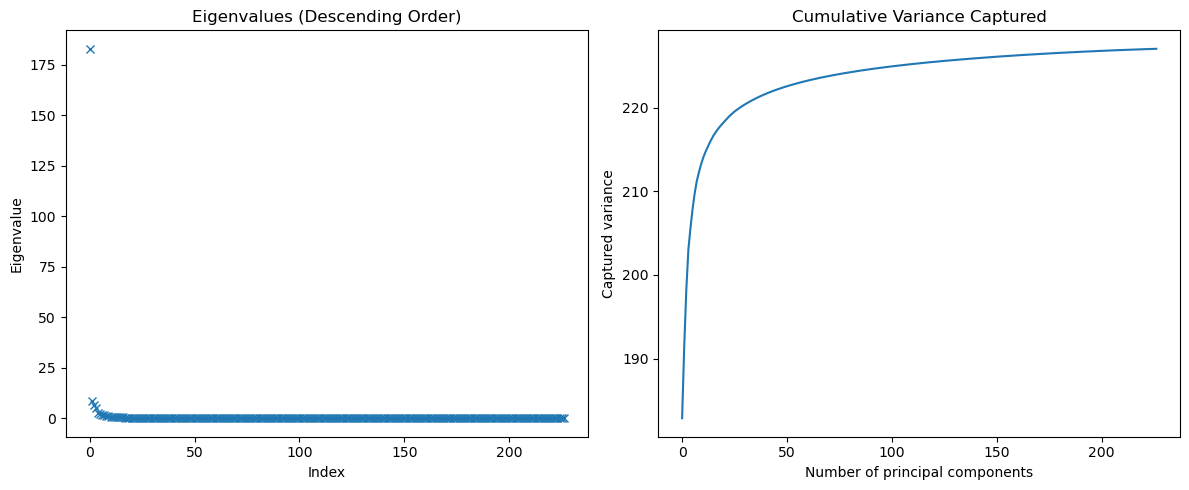

In [84]:
# Use your PCA function once with full decomposition
pca_result_full = pca(dfs_hcc_f1.to_numpy(), num_components=dfs_mcf_f1.shape[1], standardize=True)

# Extract sorted eigenvalues
eigenvalues_sorted = pca_result_full["eigenvalues"]

# (a) Scree plot: eigenvalues in descending order
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eigenvalues_sorted, 'x')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues (Descending Order)")

# (b) Cumulative captured variance
cumulative_variance = np.cumsum(eigenvalues_sorted)
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance)
plt.xlabel("Number of principal components")
plt.ylabel("Captured variance")
plt.title("Cumulative Variance Captured")

plt.tight_layout()
plt.show()


## **Step 3** : Unsupervised Learning – *Internal structure of the data*

From this point forward, we use `MCF7_Filtered_Normalised_3000_Data_train.txt`:
- Already filtered to retain high-quality cells
- Contains the top 3,000 genes with the highest variance and low redundancy
- Ready for dimensionality reduction, visualization, clustering, and classification

### **SmartSeq MCF7 Cell Line**

### **3.1** PCA Implementation
Now that we have selected the top 3,000 Highly Variable Genes (HVGs) and standardized them via z-score transformation, we apply **Principal Component Analysis (PCA)**.

PCA:
- Reduces high-dimensional data into a few informative axes
- Captures the main patterns of variation across cells
- Prepares the data for clustering, UMAP, or trajectory analysis

Each principal component is a linear combination of genes, and each cell becomes a point in this lower-dimensional space.

Our plan:
1. **Data Centering**: Subtract the mean from the dataset.

2. **Covariance Matrix Calculation**: Compute the covariance matrix of the centered data.

3. **Eigen-decomposition**: Use np.linalg.eig (or SVD) to compute eigenvalues and eigenvectors.

4. **Sorting Components**: Order the eigenvectors by the magnitude of their eigenvalues.

5. **Projection**: Project the original data onto the principal components.

6. **Reconstruction**: Reconstruct the data from the selected components and compute the reconstruction error (e.g., mean squared error).


In [85]:
from sklearn.decomposition import PCA

# Transpose: cells as rows, genes as columns
X = dfs_mcf_zscore.T

# Fit PCA
n_components = 50
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X)

# Store as DataFrame
pca_df = pd.DataFrame(pca_result, index=X.index, columns=[f"PC{i+1}" for i in range(n_components)])

# Optional: check shape
print(f"✅ PCA complete. Shape: {pca_df.shape}")
pca_df.head()

✅ PCA complete. Shape: (312, 50)


PC1        PC2  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  20.774828   5.548314   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -16.249484   9.395807   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -17.739085 -12.211008   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -25.797690  -6.474627   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.... -22.258622   2.335559   

                                                         PC3       PC4  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  2.127428 -1.041676   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  1.123825 -4.266521   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -4.075570  2.519367   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  7.596176  3.637371   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  3.122539 -4.378018   

                                                         PC5       PC6  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  1.200186 -7.018407   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  3.454706 -4.399811   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -7.611131 -5.416138   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -5.128889  7.198507   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  6.771321 -2.603774   

                                                         PC7       PC8  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  9.612521 -7.259748   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -2.003541 -0.410476   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  4.686184  2.832907   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  1.311100  4.393699   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  3.278485  4.204395   

                                                         PC9      PC10  ...  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  5.299082 -1.949169  ...   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  6.708955 -0.526406  ...   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  3.039748 -2.476317  ...   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  6.822951 -0.720520  ...   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.... -1.649135 -0.185095  ...   

                                                        PC41      PC42  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor... -3.907579 -3.676016   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -1.689421  0.256824   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -1.042825  2.468155   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  3.624242 -3.786189   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.... -3.057331  0.602983   

                                                        PC43      PC44  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  5.690575 -7.159981   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -0.084073 -2.036693   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -0.021014 -0.207191   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -0.730196 -1.721110   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  0.029647 -0.879042   

                                                        PC45      PC46  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  6.290241 -3.308639   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  0.282213  0.995853   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord....  2.791617  3.063660   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord....  0.834442  2.976134   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord....  1.149888 -0.557530   

                                                        PC47      PC48  \
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  0.135056  7.851750   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.... -1.416366  2.038824   
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.... -4.487664 -0.554749   
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.... -2.779860 -1.453030   
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.... -0.709234 -0.106409   

           

In [86]:
from sklearn.metrics import mean_squared_error

for n in [10, 20, 30, 40, 50]:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    recon_error = mean_squared_error(X, X_reconstructed)
    print(f"{n} components → MSE: {recon_error:.4f}")

10 components → MSE: 0.7538
20 components → MSE: 0.6796
30 components → MSE: 0.6229
40 components → MSE: 0.5759
50 components → MSE: 0.5313


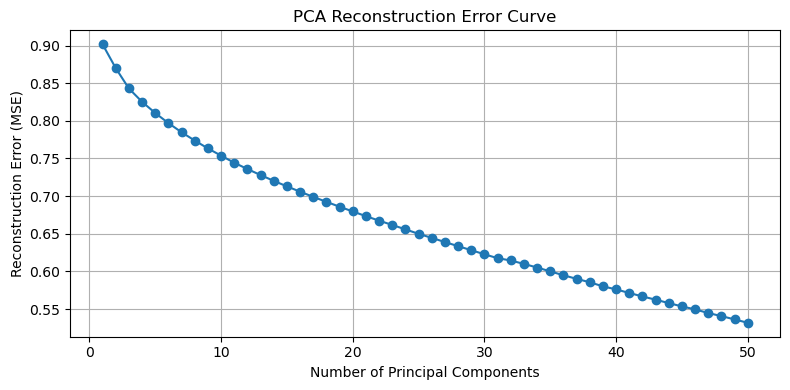

In [87]:
from sklearn.metrics import mean_squared_error

X = dfs_mcf_zscore.T  # shape: cells × genes

errors = []
components_range = range(1, 51)

for n in components_range:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    
    # Compute MSE between original and reconstructed
    mse = mean_squared_error(X, X_reconstructed)
    errors.append(mse)

# Plot reconstruction error
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(components_range, errors, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("PCA Reconstruction Error Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

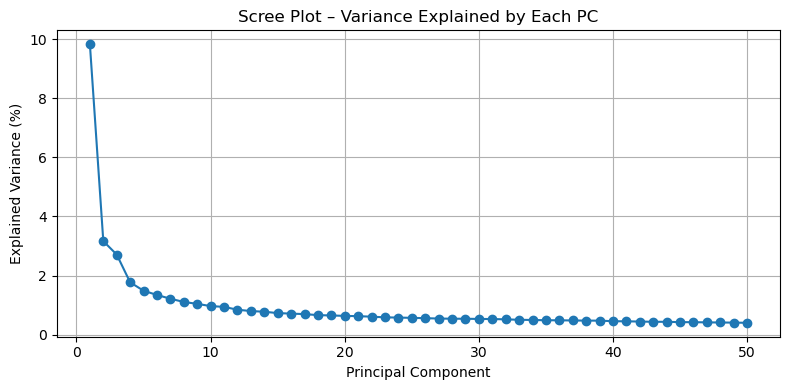

In [88]:
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.plot(range(1, n_components + 1), explained_var_ratio * 100, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Scree Plot – Variance Explained by Each PC")
plt.grid(True)
plt.tight_layout()
plt.show()

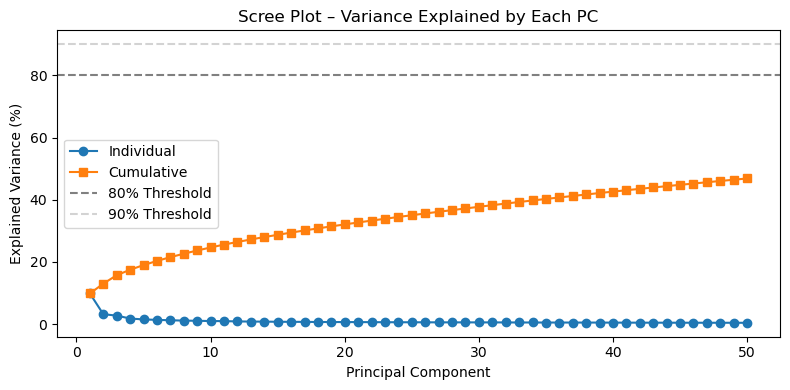

In [89]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

plt.figure(figsize=(8, 4))
plt.plot(range(1, n_components + 1), explained_var_ratio * 100, marker='o', label="Individual")
plt.plot(range(1, n_components + 1), cumulative_var * 100, marker='s', label="Cumulative")
plt.axhline(80, color='gray', linestyle='--', label="80% Threshold")
plt.axhline(90, color='lightgray', linestyle='--', label="90% Threshold")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Scree Plot – Variance Explained by Each PC")
plt.legend()
plt.tight_layout()
plt.show()

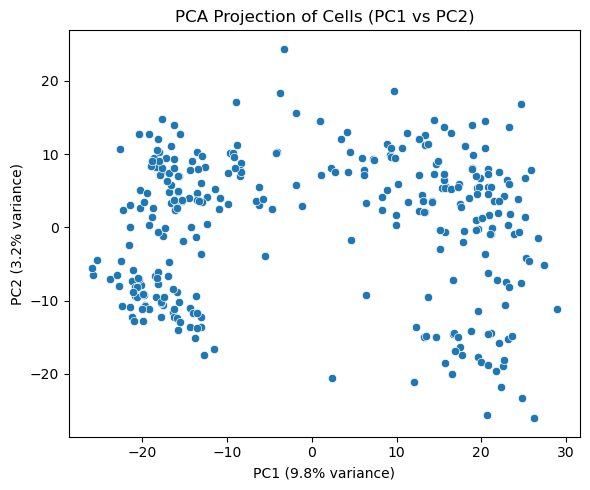

In [90]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"])
plt.title("PCA Projection of Cells (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_var_ratio[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var_ratio[1]*100:.1f}% variance)")
plt.tight_layout()
plt.show()

#### 🧠 PCA Interpretation

- The **scree plot** shows how much variance is captured by each principal component. The first few PCs usually dominate, revealing major sources of structure in the data.
- The **PC1 vs PC2 scatter plot** provides a 2D visualization of the dataset. Cells that are close together in this space likely have similar expression profiles.
- PCA helps reduce dimensionality while retaining the most important biological variation, and is a critical step before clustering or embedding (e.g., UMAP).

> We now have a low-dimensional representation of our dataset suitable for visualization and downstream inference.

## **UMAP:** Dimensionality Reduction and Visualization
Single-cell RNA sequencing (scRNA-seq) produces high-dimensional data: for each individual cell, we obtain expression levels for thousands of genes. While this rich information is powerful, it presents significant challenges for visualization, interpretation, and downstream analysis.

To understand patterns such as **cell clustering**, **transcriptional trajectories**, or **condition-specific differences** (e.g., normoxia vs. anoxia), it is essential to **project the data into a lower-dimensional space** while preserving meaningful biological variation. This is where **UMAP** plays a central role.

#### What is UMAP?

**UMAP (Uniform Manifold Approximation and Projection)** is a nonlinear dimensionality reduction technique designed for high-dimensional data. It maps data from a high-dimensional space (e.g., 10,000+ gene dimensions) to a low-dimensional space (typically 2D or 3D) for visualization.

UMAP works by:
- Constructing a **graph-based representation** of the data using a neighborhood-preserving metric in high-dimensional space.
- Optimizing a low-dimensional embedding such that the **local relationships** (i.e., which cells are close to each other) are preserved as faithfully as possible.
- Optionally preserving aspects of **global structure** such as cluster separation or continuous gradients.

UMAP is especially popular in biology because it:
- Captures **nonlinear** structure (e.g., differentiation trajectories)
- Preserves **local neighborhoods**
- Is **scalable** and **fast**
- Produces visually interpretable 2D/3D scatterplots

#### Why Not Apply UMAP Directly to Gene Expression Data?

While UMAP can be applied directly to the (filtered and normalized) gene expression matrix, **this is generally discouraged** for scRNA-seq. The reasons are:

❌ High Dimensionality
- The typical gene expression matrix has **thousands of features** (genes), most of which are either noisy, redundant, or uninformative.
- High-dimensional spaces are sparse and counterintuitive ("curse of dimensionality").

 ❌ Noisy & Sparse Data
- scRNA-seq data is inherently **noisy and sparse** due to technical dropouts and low coverage.
- UMAP is sensitive to noise: the graph it constructs may be unstable if irrelevant dimensions dominate.

 ❌ Computational Cost
- UMAP’s runtime increases with dimensionality.
- Applying UMAP to 10,000+ dimensions is inefficient and unnecessary.

#### Why PCA Before UMAP?

**PCA (Principal Component Analysis)** is a linear dimensionality reduction technique that transforms the data into a new coordinate system defined by axes (principal components) that maximize variance.

Applying PCA before UMAP provides several advantages:

 ✅ Denoising and Compression
- PCA removes noise by retaining only the top *k* components (e.g., 30–50) that explain the majority of the variation.
- This results in a compressed, denoised representation of the data.

✅ Speed and Stability
- Reducing the number of input dimensions to UMAP **significantly reduces computation time**.
- UMAP becomes more **deterministic** and **reproducible** when applied to PCA-reduced data.

 ✅ Emphasis on Biologically Relevant Variation
- The top PCs often capture **cell type differences**, **cell cycle effects**, or **condition-specific variation**.
- Feeding UMAP a PCA-reduced input helps it focus on these meaningful differences.

After reducing the dimensionality of our gene expression data using PCA, we apply **UMAP** to visualize the structure of the cells in 2D space.
1. Run UMAP
We apply UMAP to the PCA output (stored in `pca_df`). UMAP reduces the data to two dimensions, preserving the relationships between similar cells.
- `n_neighbors=15`: how many neighbors to consider when building the graph.
- `min_dist=0.1`: controls how close the points are (lower = tighter clusters).
- `n_components=2`: we project into 2D space for plotting.
- `random_state=42`: ensures reproducible results.
2. Store Results
The 2D UMAP coordinates are saved in a new DataFrame (`umap_df`) with the same cell index.

3. Plot
We make a scatterplot where:
- Each point is a cell.
- The axes (`UMAP1` and `UMAP2`) show the 2D embedding.
- Optionally, we can color cells by labels like condition or cell type.

Why We Use UMAP:
UMAP helps us see patterns and clusters in complex data, like:
- Cell types or subpopulations
- Condition-specific shifts (e.g., normoxia vs. anoxia)
- Potential trajectories
We use PCA first to reduce noise and speed up UMAP.

/opt/anaconda3/envs/ai_lab/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/ai_lab/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


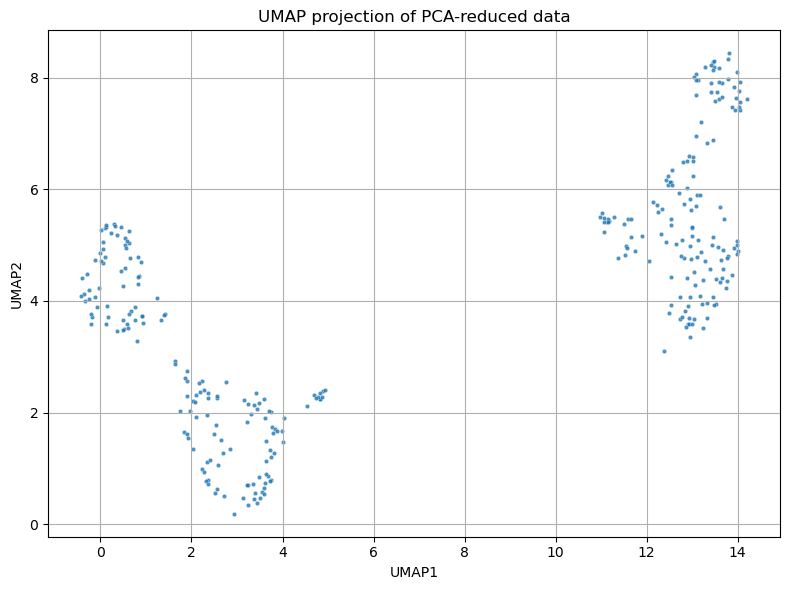

In [91]:
# Assuming pca_df is your PCA output: shape (n_cells, n_components)
# If you also have metadata (e.g., condition, cell type), you can merge it below

# Step 1: Run UMAP on PCA-reduced data
reducer = umap.UMAP(n_neighbors=15,  # typical: 10–50
                    min_dist=0.1,    # typical: 0.1–0.5
                    n_components=2,  # 2D plot
                    random_state=42)
umap_result = reducer.fit_transform(pca_df)

# Step 2: Store UMAP results in a DataFrame
umap_df = pd.DataFrame(umap_result, index=pca_df.index, columns=['UMAP1', 'UMAP2'])

# Optional: merge with cell metadata (e.g., condition or cell type) ???????????????????????????????????????????????????????????????????????????????????????????????????????
# Assuming you have a DataFrame 'metadata' with same index
# umap_df = umap_df.join(metadata[['condition', 'cell_type']])

# Step 3: Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='UMAP1', y='UMAP2',
    data=umap_df,
    # hue='condition',  # uncomment if you have labels
    s=10, alpha=0.8
)
plt.title('UMAP projection of PCA-reduced data')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid(True)
plt.tight_layout()
plt.show()


The UMAP plot above shows a 2D embedding of cells based on their gene expression profiles, after reducing dimensionality with PCA.

Each point represents a single cell. The structure of the plot reveals two well-separated clusters, suggesting that the cells fall into two distinct transcriptional groups. This separation may reflect different biological conditions (e.g., normoxia vs. anoxia), cell types, or technical batches. 

To interpret the clusters biologically, we now merge this projection with metadata (e.g., condition labels) and visualize the annotated result.


# AGGIUNGI IL MERGE CON IL METADATA DI UMAP !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### **SmartSeq HCC1806 Cell Line**

### **DropSeq MCF7 Cell Line**

### **DropSeq HCC1806 Cell Line**